**MaternAI: Predicting Pregnancy Risks with
 Machine Learning**

 This project aims to develop a predictive model to assess pregnancy
 risk based on various factors such as age, blood pressure, blood sugar
 levels, and other relevant parameters.

**2. Import - Packages & Dataset**

In [397]:
# Import Required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import Dataset**

In [398]:
# Load the Dataset
data = pd.read_csv("/content/pregnancy_risk_data.csv", encoding='ISO-8859-1')

In [399]:
data

Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
0        1994601     Moulya   20                  97.5               91   
1        2001562       Soni   45                  97.7               99   
2        2002530   Baishali   29                  98.6               84   
3        2002114  Abhilasha   26                  99.5              135   
4        2002058     Aanaya   38                 102.5               51   
...          ...        ...  ...                   ...              ...   
6098     2002617   Pragalya   24                  96.0              101   
6099     2003332   Jyoshita   38                  96.0               59   
6100     2012649   Mrimnayi   40                 103.3              145   
6101     2010533   Vardhani   21                  99.0              130   
6102     2002215   Nivashni   29                  98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                              101   
4                                106                               91   
...                              ...                              ...   
6098                             142                               97   
6099                             129                               94   
6100                             123                               95   
6101                             152                               99   
6102                             136                               80   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
0            24.9                    41                                5.8   
1            22.1                    36                                5.7   
2            19.0                    42                                6.4   
3            23.7                    46                                4.5   
4            18.8                    38                                4.3   
...           ...                   ...                                ...   
6098         20.3                    39                                6.7   
6099         20.0                    39                                7.0   
6100         24.6                    36                                5.0   
6101         23.2                    47                                6.6   
6102         24.9                    38                                4.5   

        Outcome  
0     high risk  
1     high risk  
2      mid risk  
3     high risk  
4     high risk  
...         ...  
6098   mid risk  
6099  high risk  
6100  high risk  
6101  high risk  
6102   low risk  

[6103 rows x 11 columns]

In [400]:
data.head()

Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
0     1994601     Moulya   20                  97.5               91   
1     2001562       Soni   45                  97.7               99   
2     2002530   Baishali   29                  98.6               84   
3     2002114  Abhilasha   26                  99.5              135   
4     2002058     Aanaya   38                 102.5               51   

   Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                             161                              100   
1                              99                               94   
2                             129                               87   
3                             161                              101   
4                             106                               91   

   BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
0         24.9                    41                                5.8   
1         22.1                    36                                5.7   
2         19.0                    42                                6.4   
3         23.7                    46                                4.5   
4         18.8                    38                                4.3   

     Outcome  
0  high risk  
1  high risk  
2   mid risk  
3  high risk  
4  high risk

In [401]:
data.shape

(6103, 11)

In [402]:
data.size

67133

**Variable Description & Identification**

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

**Variable Description**
There are total 7 variables, and each variables has 1014 observations. Here is the description of all variables:

Age: Any ages in years when a women during pregnant.

SystolicBP: Upper value of Blood Pressure in mmHg.

DiastolicBP: Lower value of Blood Pressure in mmHg,

BS: Blood glucose levels is in terms of a molar concentration, mmol/L.

BodyTemp: Women body temperature.
HeartRate: A normal resting heart rate in beats per minute.

Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

Here, we have Risk Level as target variable, and the rest of the variables are predictor variables.

**Variable Data Types**

**Categorical Variable:** Risk Level.

**Numerical Variable:** Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate.

**Checking Null/Missing Values**

**df.isnull( ).sum( )** is a method chain used to get the count of missing or null values in each column of a DataFrame.

In [404]:
# Check for missing values
data.isnull().sum()

Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

In [405]:
# Calculate the number of null values per row
null_values_per_row = data.isnull().sum(axis=1)

# Now you can use null_values_per_row to filter your DataFrame
rows_with_null_values = data[null_values_per_row > 0]
rows_with_null_values

Empty DataFrame
Columns: [Patient ID, Name, Age, Body Temperature(F) , Heart rate(bpm), Systolic Blood Pressure(mm Hg), Diastolic Blood Pressure(mm Hg), BMI(kg/m 2), Blood Glucose(HbA1c), Blood Glucose(Fasting hour-mg/dl), Outcome]
Index: []

**Checking Duplicate Values**

Duplication means that we have repeated data in our dataset. The reasons for duplicate values can be-

Data entry errors

Data collection methods

In [406]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [407]:
print(f"Total number of duplicates: {data.duplicated().sum()}")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

Total number of duplicates: 0


Empty DataFrame
Columns: [Patient ID, Name, Age, Body Temperature(F) , Heart rate(bpm), Systolic Blood Pressure(mm Hg), Diastolic Blood Pressure(mm Hg), BMI(kg/m 2), Blood Glucose(HbA1c), Blood Glucose(Fasting hour-mg/dl), Outcome]
Index: []

In [408]:
data.describe()

Patient ID          Age  Body Temperature(F)   Heart rate(bpm)  \
count  6.103000e+03  6103.000000           6103.000000      6103.000000   
mean   2.003343e+06    26.425037             98.665574        86.100770   
std    6.604395e+03     6.390205              1.590983        22.627587   
min    1.993365e+06    15.000000             39.600000        45.000000   
25%    1.994890e+06    22.000000             98.600000        72.000000   
50%    2.003000e+06    25.000000             98.600000        80.000000   
75%    2.010128e+06    30.000000             98.800000        91.000000   
max    2.013179e+06   250.000000            104.000000       150.000000   

       Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
count                     6103.000000                      6103.000000   
mean                       129.218253                        87.257578   
std                         17.234217                         7.793099   
min                         90.000000                         9.000000   
25%                        120.000000                        82.000000   
50%                        128.000000                        87.000000   
75%                        141.000000                        92.000000   
max                        169.000000                       142.000000   

       BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  
count  6103.000000           6103.000000                        6103.000000  
mean     21.435581             37.904473                           5.504752  
std       2.157060              4.400272                           0.905327  
min      14.900000             30.000000                           3.500000  
25%      19.600000             34.000000                           4.800000  
50%      21.300000             38.000000                           5.700000  
75%      23.100000             41.000000                           6.000000  
max      27.900000             50.000000                           8.900000

In [409]:
rows_with_age_above_200 = data[data['Age'] > 200]
rows_with_age_above_200

Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
134     2003689  Kundhavai  250                  98.6               76   

     Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
134                             126                               85   

     BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
134         24.1                    42                                5.9   

      Outcome  
134  low risk

In [410]:
Diastolic_BloodPressure_outlier=data[data['Diastolic Blood Pressure(mm Hg)']<20]
Diastolic_BloodPressure_outlier

Patient ID      Name  Age  Body Temperature(F)   Heart rate(bpm)  \
4166     2001637  Varshita   22                  98.8               75   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
4166                             161                                9   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
4166         26.4                    41                                6.3   

        Outcome  
4166  high risk

In [411]:
data.drop(['Patient ID', 'Name'], axis=1,inplace=True)

In [412]:
data.sample(10)

Age  Body Temperature(F)   Heart rate(bpm)  \
1095   34                  98.8              115   
4570   21                  98.6               76   
6010   22                  98.6               84   
577    20                  98.6               77   
2526   25                  98.6               85   
3709   21                  98.8               70   
4231   37                  98.6              140   
3415   23                  98.6               83   
4138   30                  98.6               67   
3984   19                  96.1               55   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
1095                             116                               78   
4570                             129                               85   
6010                             138                               78   
577                              128                               84   
2526                             140                               85   
3709                             141                               80   
4231                             111                              103   
3415                             142                               91   
4138                             129                               91   
3984                             110                               81   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
1095         21.8                    43                                6.0   
4570         21.8                    39                                5.9   
6010         20.0                    38                                5.9   
577          23.1                    35                                5.8   
2526         20.2                    36                                4.9   
3709         18.8                    35                                5.6   
4231         24.5                    49                                7.0   
3415         20.1                    34                                5.7   
4138         22.5                    45                                6.7   
3984         19.8                    32                                4.7   

        Outcome  
1095   mid risk  
4570   low risk  
6010   low risk  
577    low risk  
2526   low risk  
3709   mid risk  
4231  high risk  
3415   mid risk  
4138   mid risk  
3984  high risk

**Univariate Analysis**

Univariate analysis involves examining each variable in a dataset separately to determine its distribution, including its range of values and central tendency. Unlike bivariate and multivariate analysis, univariate data analysis does not consider relationships between variables, instead summarizing each variable independently.

The methods used to perform univariate analysis depend on whether the variable is categorical or numerical. For numerical variables, we typically examine the shape of their distribution, which can be symmetric or skewed, using techniques like histograms and density plots. For categorical variables, we use bar plots to visualize their absolute and proportional frequency distributions.

**Categorical Variables**

For categorical variables, we'll just checking the frequency distribution of the data using bar plot. Another way to show the relationships between classes or categories of a variable is in a pie or circle chart. In a pie chart, each "slice" represents the proportion of the total phenomenon that is due to each of the classes or groups.

**Risk Level**

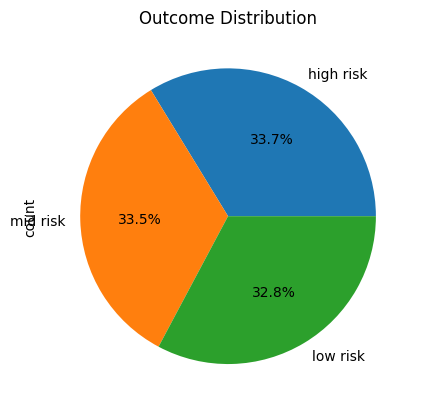

In [413]:
# Example pie chart
data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.show()


**Numerical Variables**

Unlike categorical variables that represent different classes/categories with only a few distinct values, numerical variables are continuous and take on a range of values. Therefore, to better understand the distribution of data for each numerical variable, we use histograms rather than bar charts. Histograms are used for interval and ratio level variables, and are similar to bar charts.

In addition to examining the distribution, it is important to identify and address outliers in numerical data. Outliers are observations that deviate significantly from the rest of the values in a random sample from a population. Non-randomly distributed outliers can negatively impact normality, skew the distribution, increase error variance, reduce the power of statistical tests, and bias or influence estimates. To identify outliers, we can use box plots to visualize continuous data. Before examining the distribution and identifying outliers, we can use the describe() function from pandas to display descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution for initial observations.

In [414]:
data.describe().T

count        mean        std   min    25%  \
Age                                6103.0   26.425037   6.390205  15.0   22.0   
Body Temperature(F)                6103.0   98.665574   1.590983  39.6   98.6   
Heart rate(bpm)                    6103.0   86.100770  22.627587  45.0   72.0   
Systolic Blood Pressure(mm Hg)     6103.0  129.218253  17.234217  90.0  120.0   
Diastolic Blood Pressure(mm Hg)    6103.0   87.257578   7.793099   9.0   82.0   
BMI(kg/m 2)                        6103.0   21.435581   2.157060  14.9   19.6   
Blood Glucose(HbA1c)               6103.0   37.904473   4.400272  30.0   34.0   
Blood Glucose(Fasting hour-mg/dl)  6103.0    5.504752   0.905327   3.5    4.8   

                                     50%    75%    max  
Age                                 25.0   30.0  250.0  
Body Temperature(F)                 98.6   98.8  104.0  
Heart rate(bpm)                     80.0   91.0  150.0  
Systolic Blood Pressure(mm Hg)     128.0  141.0  169.0  
Diastolic Blood Pressure(mm Hg)     87.0   92.0  142.0  
BMI(kg/m 2)                         21.3   23.1   27.9  
Blood Glucose(HbA1c)                38.0   41.0   50.0  
Blood Glucose(Fasting hour-mg/dl)    5.7    6.0    8.9

In [415]:
def num_plot(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

In [416]:
data.columns

Index(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')

**Age**

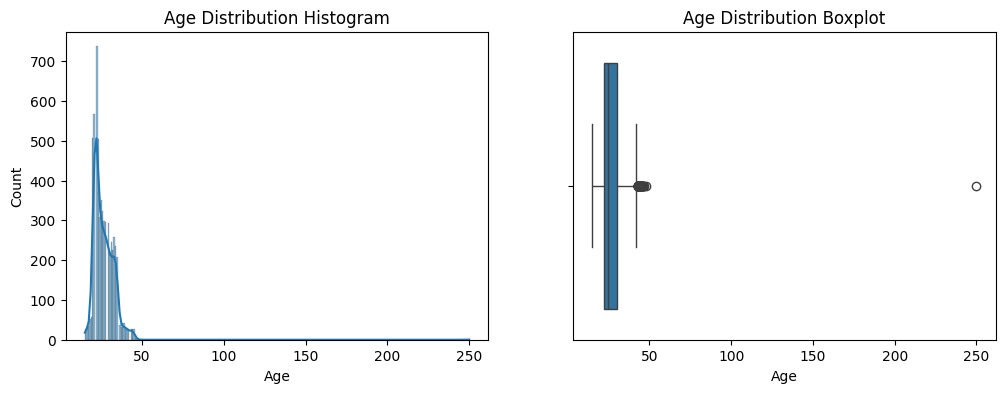

In [323]:
num_plot(data, "Age")

**Body Temperature(F)**

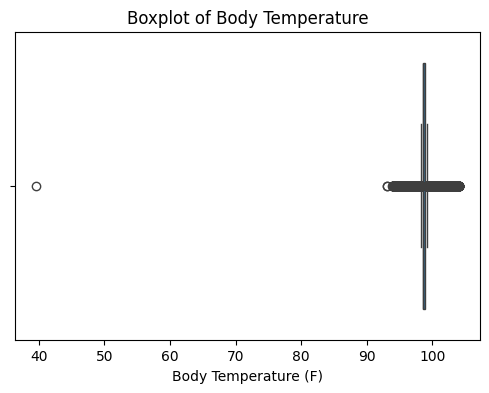

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your column name is 'Body Temperature(F) ' (with a space after (F))

plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Body Temperature(F) '])

plt.title('Boxplot of Body Temperature')
plt.xlabel('Body Temperature (F)')
plt.show()

**Heart rate(bpm)**

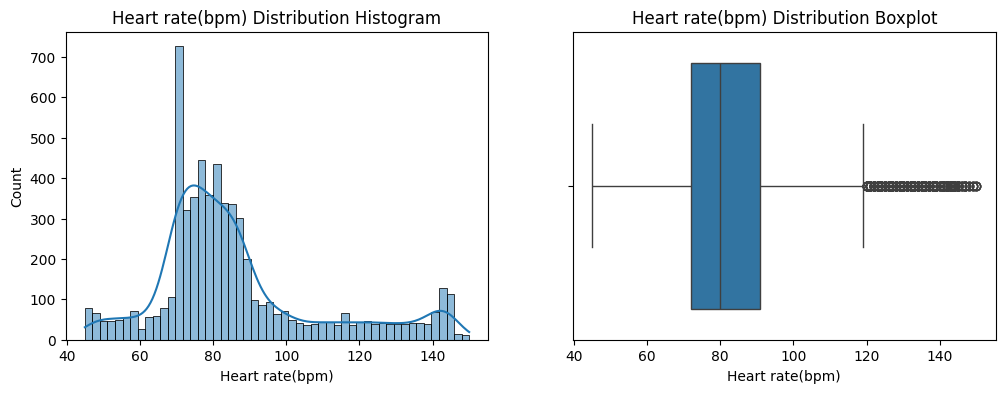

In [418]:
num_plot(data, "Heart rate(bpm)")

**Systolic Blood Pressure(mm Hg)**

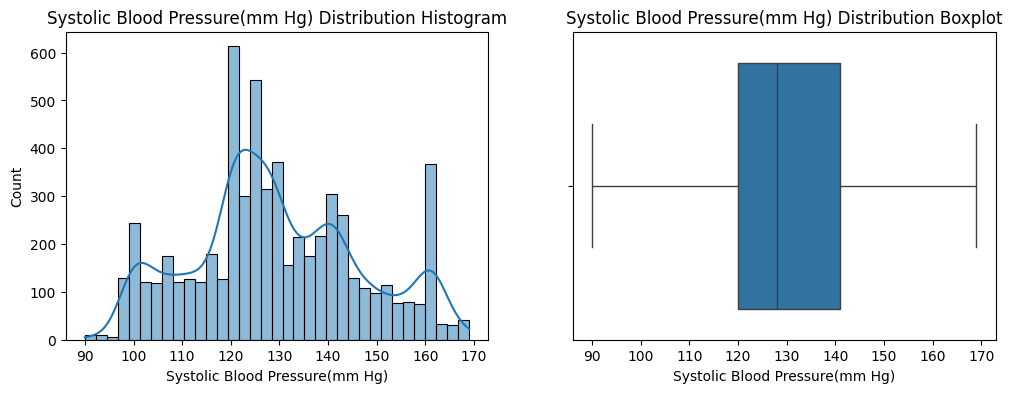

In [419]:
num_plot(data, "Systolic Blood Pressure(mm Hg)")

**Diastolic Blood Pressure(mm Hg)**

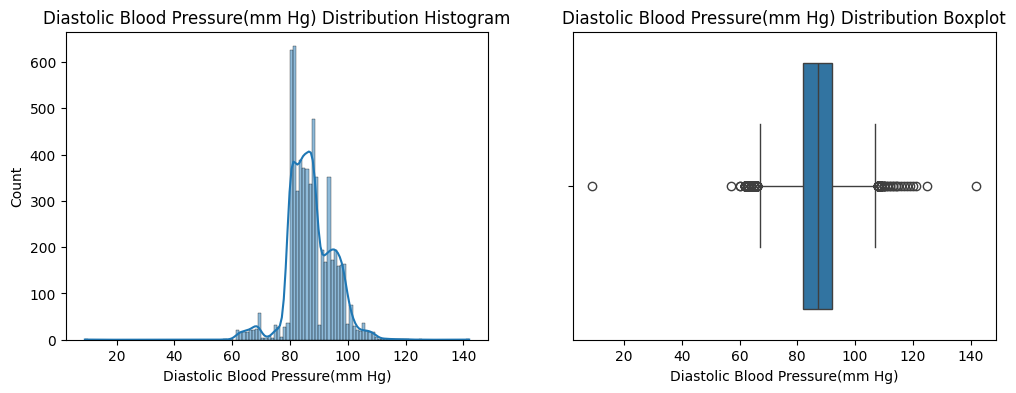

In [420]:
num_plot(data, "Diastolic Blood Pressure(mm Hg)")

**BMI(kg/m 2)**

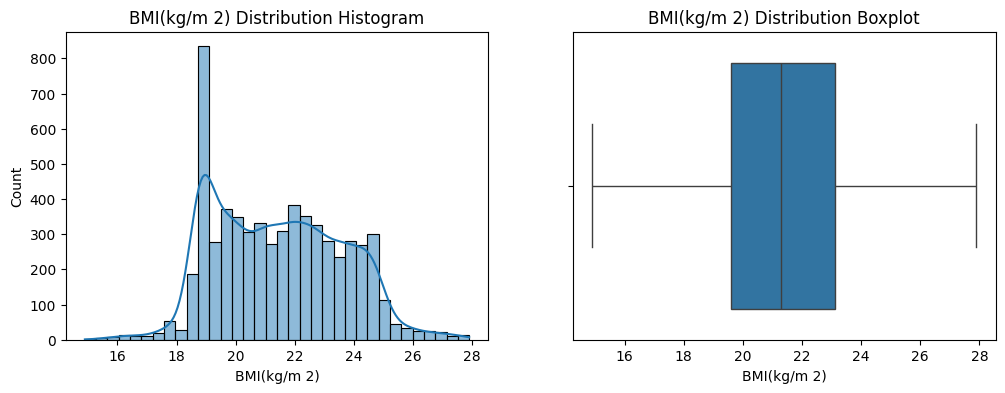

In [421]:
num_plot(data, "BMI(kg/m 2)")

**Blood Glucose(HbA1c)**

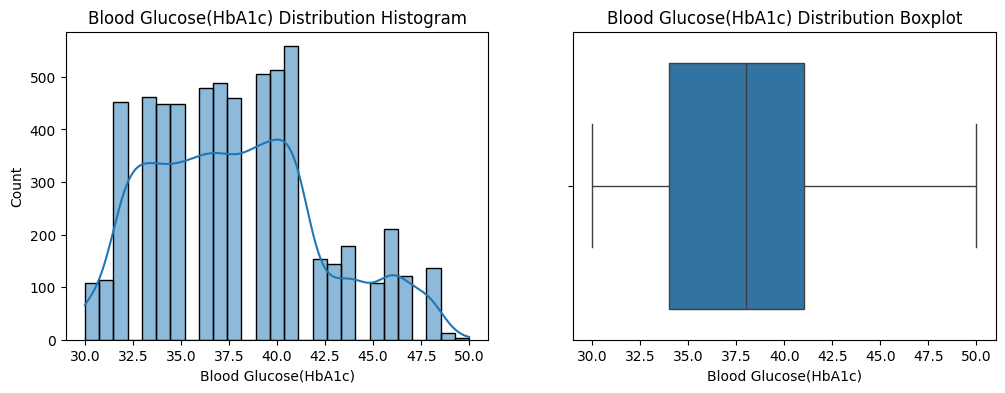

In [422]:
num_plot(data, "Blood Glucose(HbA1c)")

**Blood Glucose(Fasting hour-mg/dl)**

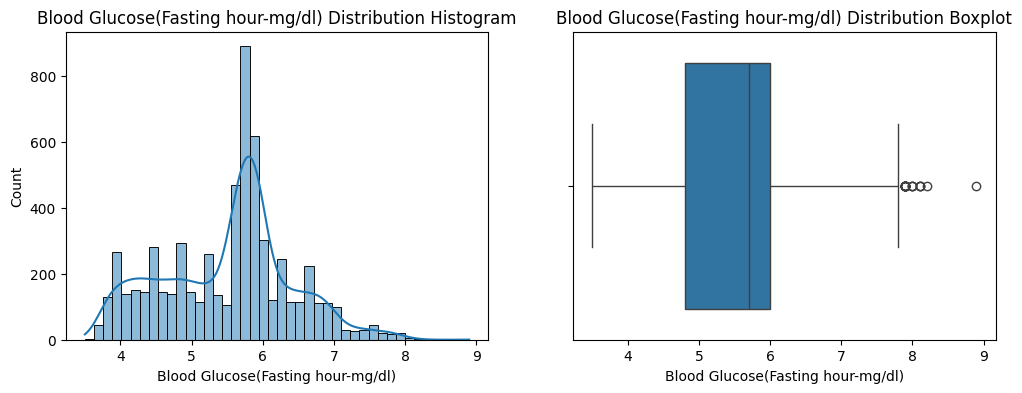

In [423]:
num_plot(data, "Blood Glucose(Fasting hour-mg/dl)")

 **Numerical Variables**

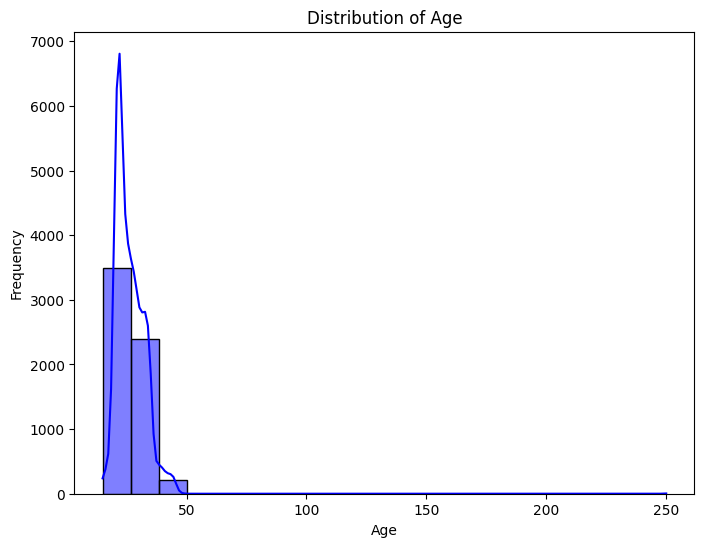

In [424]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [425]:
# Remove rows where Age is 250
data = data[data['Age'] != 250]

# Verify the change
print("Data shape after removing rows with Age 250:", data.shape)
data['Age'].value_counts()  # Check for remaining age values

Data shape after removing rows with Age 250: (6102, 9)


Age
22    737
21    567
20    506
23    505
25    350
26    324
24    308
27    299
28    295
29    294
33    259
31    246
34    235
32    226
30    220
35    209
19     56
18     51
38     41
39     41
36     36
17     35
37     32
40     32
16     30
41     29
15     28
45     27
43     26
44     26
42     26
46      4
47      1
48      1
Name: count, dtype: int64

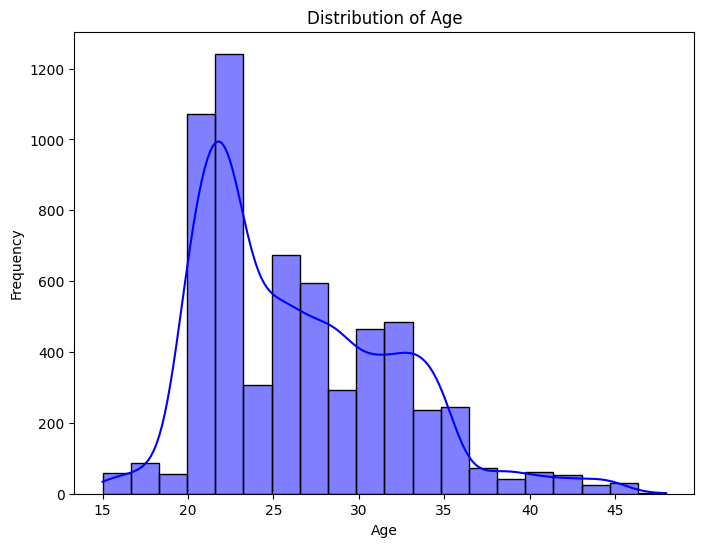

In [426]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

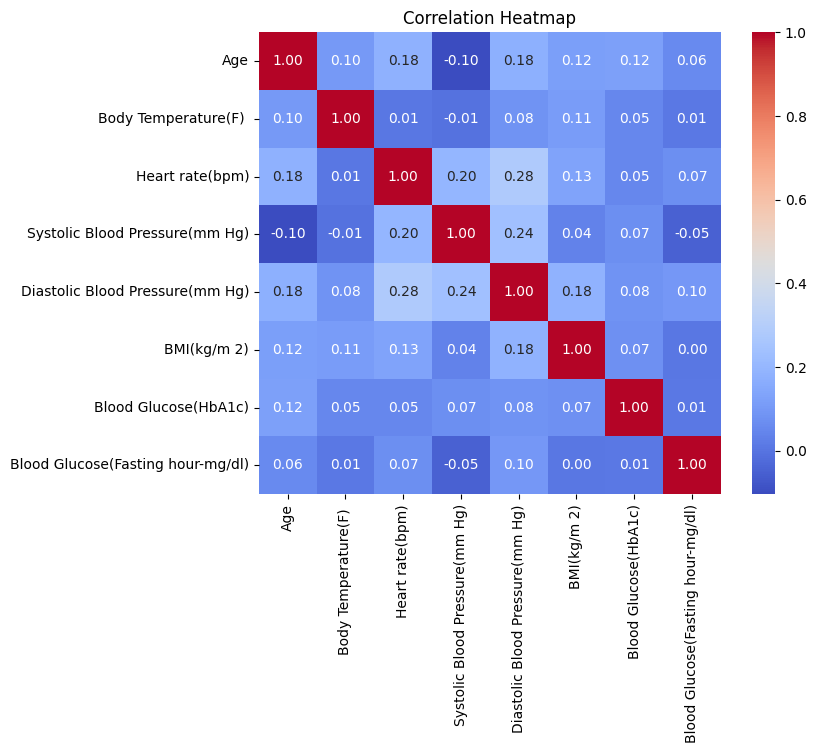

In [427]:
# Heatmap for Correlation Matrix
# Select only numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['number'])

# Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = numerical_data.corr()  # Compute correlations for numerical data
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

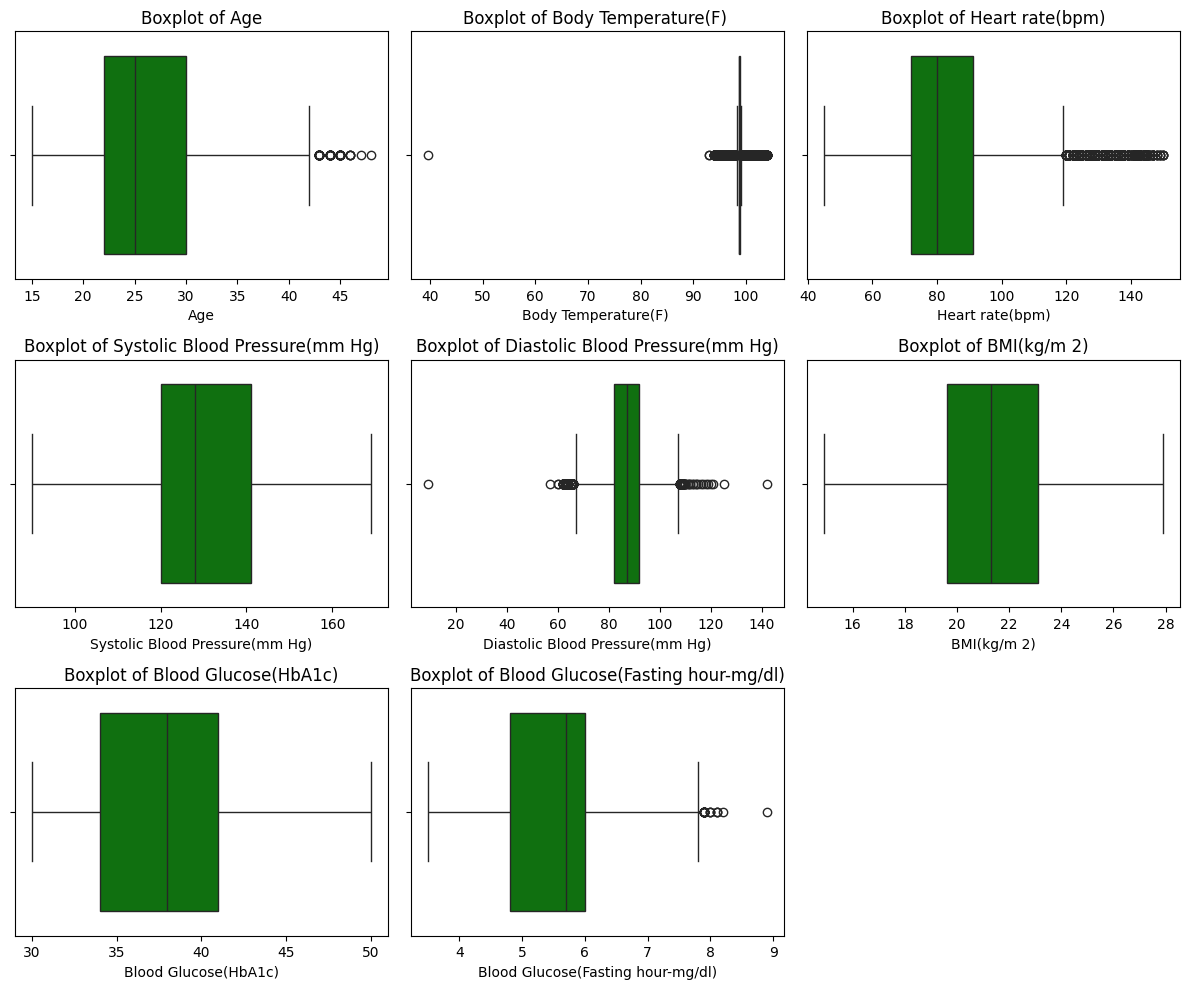

In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your data loading and other code)

# Boxplot for Outliers in Numerical Columns
numerical_columns = ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)',
                     'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
                     'Blood Glucose(Fasting hour-mg/dl)']

# Ensure the column names match exactly (including trailing spaces)
numerical_columns_cleaned = [col.strip() for col in numerical_columns]
numerical_columns = [col for col in numerical_columns if col in data.columns or col.strip() in data.columns]

# ... (rest of the code remains the same)

# Plot the boxplots for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='green')  # Use 'x=' for horizontal boxplot
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

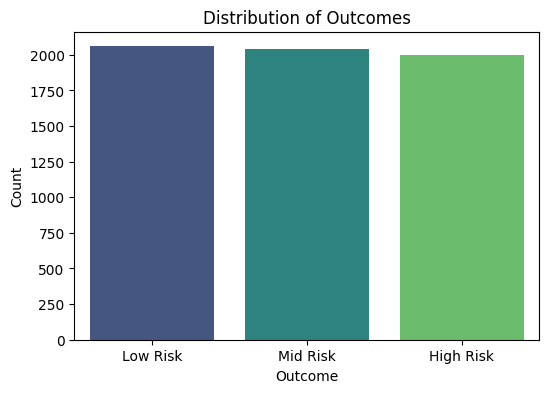

In [429]:
# Countplot for Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='viridis')
plt.title("Distribution of Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.show()

In [430]:
# Pairplot for Feature Relationships
plt.figure(figsize=(12, 12))
sns.pairplot(data, vars=numerical_columns, hue='Outcome', palette='viridis')
plt.title("Pairplot of Features Colored by Outcome")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Predictor and Target**

We will use histogram with hue mapping to visualize the predictor variables data distribution based on the target variable. Also, since our predictor variable only has few unique values, we can also use pandas crosstab to see the detailed values.

**Age → RiskLevel**

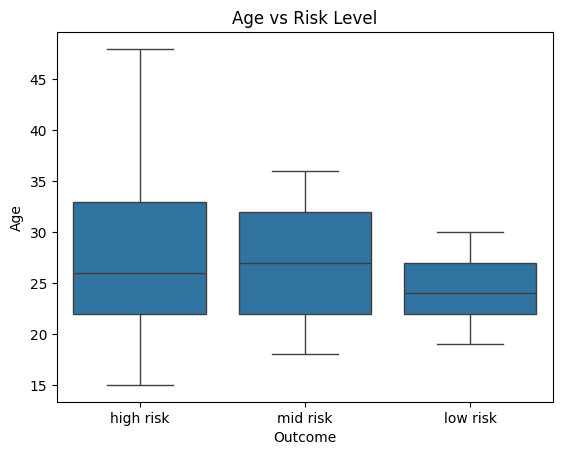

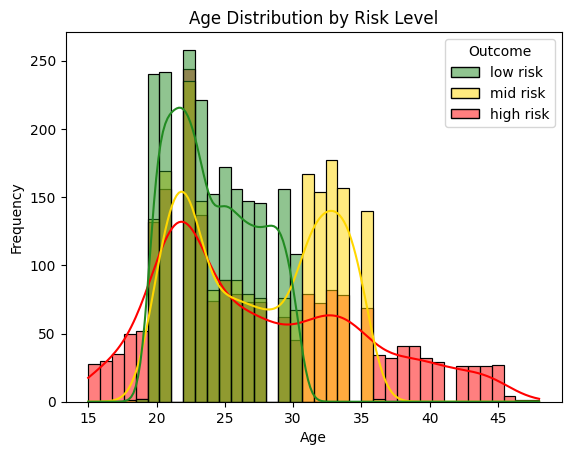

In [431]:
# Bivariate analysis: Age vs Outcome
sns.boxplot(data=data, x='Outcome', y='Age')
plt.title('Age vs Risk Level')
plt.show()

# Repeat similar code for Systolic and Diastolic Blood Pressure, Body Temperature, Heart Rate, etc.import seaborn as sns
import matplotlib.pyplot as plt

# Define the order and colors for the risk levels
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]

# Plot: Age distribution by Risk Level (Outcome)
sns.histplot(data=data, x="Age", hue="Outcome", kde=True, hue_order=risk_order, palette=p_colors)
plt.title("Age Distribution by Risk Level")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [432]:
# Cross-tabulation of Outcome (Risk Level) by Age
cross_tab = pd.crosstab(data['Outcome'], data['Age']).style.background_gradient(cmap='summer_r')

# Display the styled cross-tabulation
cross_tab

 SystolicBP → RiskLevel

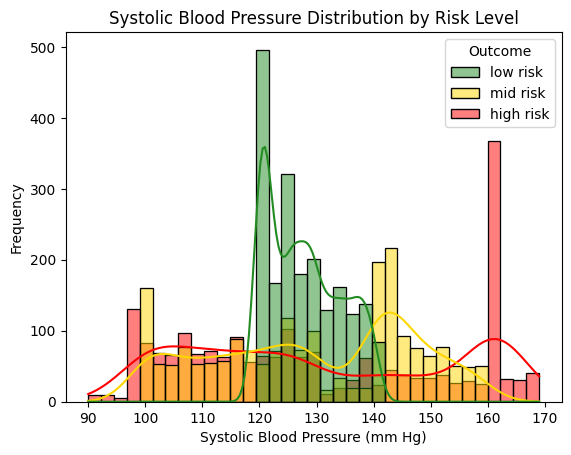

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette and order for the risk levels
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]

# Plot: Systolic Blood Pressure distribution by Risk Level (Outcome)
sns.histplot(data=data, x="Systolic Blood Pressure(mm Hg)", hue="Outcome", kde=True, hue_order=risk_order, palette=p_colors)
plt.title("Systolic Blood Pressure Distribution by Risk Level")
plt.xlabel("Systolic Blood Pressure (mm Hg)")
plt.ylabel("Frequency")
plt.show()

In [434]:
import pandas as pd

# Cross-tabulation of Outcome (Risk Level) by Systolic Blood Pressure
cross_tab = pd.crosstab(data['Outcome'], data['Systolic Blood Pressure(mm Hg)']).style.background_gradient(cmap='summer_r')

# Display the styled cross-tabulation
cross_tab

DiastolicBP → RiskLevel

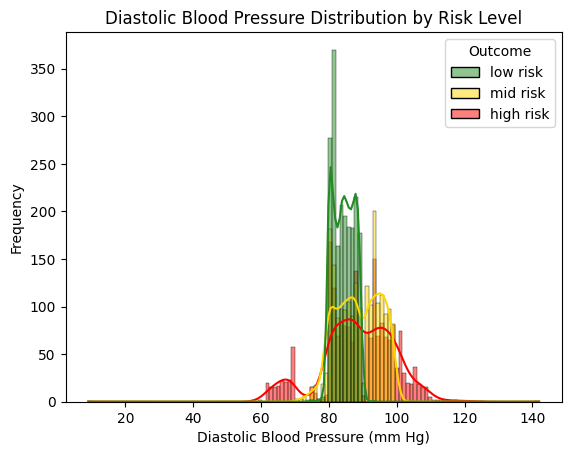

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order and colors for the risk levels
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]

# Plot: Diastolic Blood Pressure distribution by Risk Level (Outcome)
sns.histplot(data=data, x="Diastolic Blood Pressure(mm Hg)", hue="Outcome", kde=True, hue_order=risk_order, palette=p_colors)
plt.title("Diastolic Blood Pressure Distribution by Risk Level")
plt.xlabel("Diastolic Blood Pressure (mm Hg)")
plt.ylabel("Frequency")
plt.show()

In [436]:
import pandas as pd

# Cross-tabulation of Outcome (Risk Level) by Diastolic Blood Pressure
cross_tab = pd.crosstab(data['Outcome'], data['Diastolic Blood Pressure(mm Hg)']).style.background_gradient(cmap='summer_r')

# Display the styled cross-tabulation
cross_tab

BS → RiskLevel

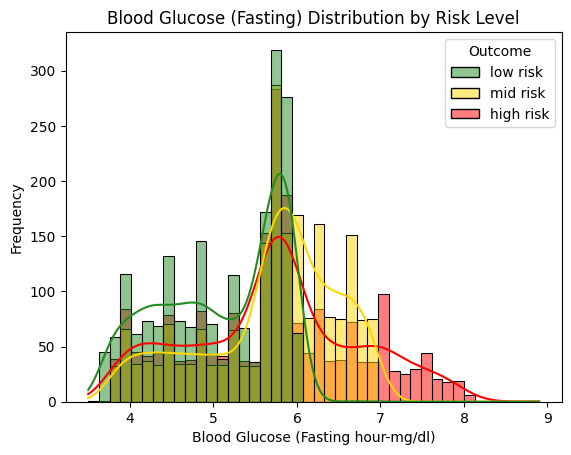

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette and order for the risk levels
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]

# Plot: Blood Glucose distribution by Risk Level (Outcome)
sns.histplot(data=data, x="Blood Glucose(Fasting hour-mg/dl)", hue="Outcome", kde=True, hue_order=risk_order, palette=p_colors)
plt.title("Blood Glucose (Fasting) Distribution by Risk Level")
plt.xlabel("Blood Glucose (Fasting hour-mg/dl)")
plt.ylabel("Frequency")
plt.show()

In [438]:
import pandas as pd

# Cross-tabulation of Outcome (Risk Level) by Blood Glucose (Fasting)
cross_tab = pd.crosstab(data['Outcome'], data['Blood Glucose(Fasting hour-mg/dl)']).style.background_gradient(cmap='summer_r')

# Display the styled cross-tabulation
cross_tab

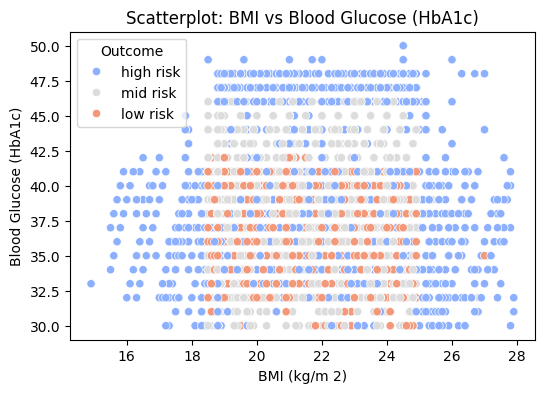

In [439]:
# Pairwise scatter plot of BMI vs Blood Glucose levels, colored by Outcome
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='BMI(kg/m 2)', y='Blood Glucose(HbA1c)', hue='Outcome', palette='coolwarm')
plt.title('Scatterplot: BMI vs Blood Glucose (HbA1c)')
plt.xlabel('BMI (kg/m 2)')
plt.ylabel('Blood Glucose (HbA1c)')
plt.show()

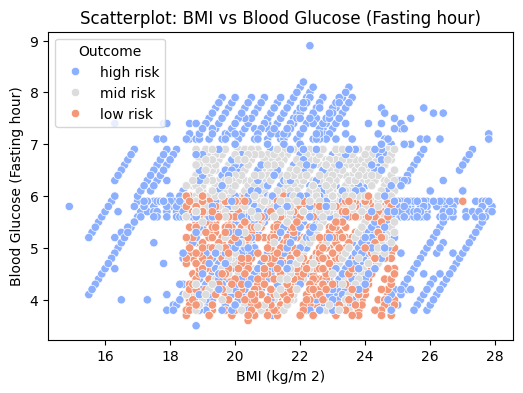

In [440]:
# Pairwise scatter plot of BMI vs Blood Glucose (Fasting hour), colored by Outcome
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='BMI(kg/m 2)', y='Blood Glucose(Fasting hour-mg/dl)', hue='Outcome', palette='coolwarm')
plt.title('Scatterplot: BMI vs Blood Glucose (Fasting hour)')
plt.xlabel('BMI (kg/m 2)')
plt.ylabel('Blood Glucose (Fasting hour)')
plt.show()

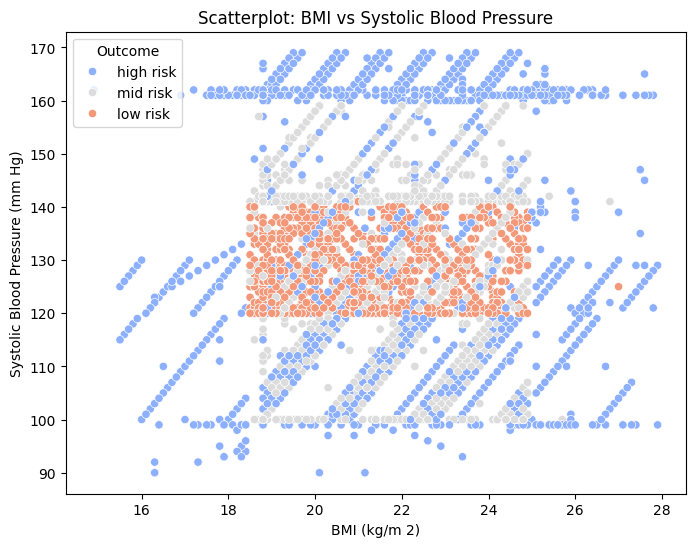

In [441]:
# Pairwise scatter plot: BMI vs Blood Pressure (Systolic), colored by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='BMI(kg/m 2)', y='Systolic Blood Pressure(mm Hg)', hue='Outcome', palette='coolwarm')
plt.title('Scatterplot: BMI vs Systolic Blood Pressure')
plt.xlabel('BMI (kg/m 2)')
plt.ylabel('Systolic Blood Pressure (mm Hg)')
plt.show()

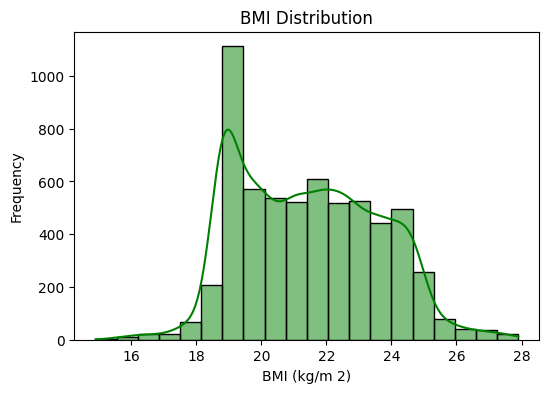

In [442]:
# Distribution of BMI (kg/m²)
plt.figure(figsize=(6, 4))
sns.histplot(data['BMI(kg/m 2)'], bins=20, kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI (kg/m 2)')
plt.ylabel('Frequency')
plt.show()

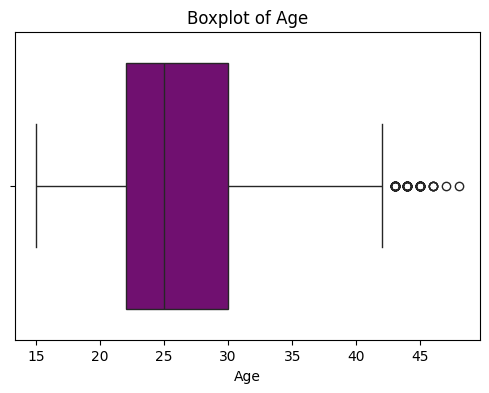

In [443]:
# Boxplot to detect outliers in Age
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Age', color='purple')
plt.title('Boxplot of Age')
plt.show()

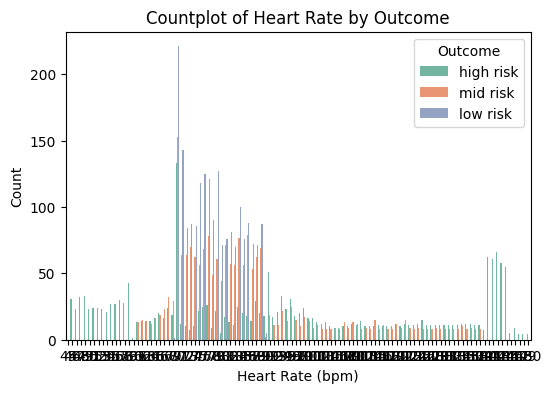

In [444]:
# Countplot for 'Heart rate(bpm)' categorized by Outcome
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Heart rate(bpm)', hue='Outcome', palette='Set2')
plt.title('Countplot of Heart Rate by Outcome')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Count')
plt.show()


**Multivariate Analysis**

To conduct multivariate analysis, we examine the relationships between multiple variables, typically more than two, to determine any potential associations and correlations. Specifically, we aim to identify the relationship between one or more predictor variables and a response variable.

In this scenario, we will be examining the influence of two distinct predictor variables on the RiskLevel variable. We will employ a scatter plot to visualize the numerical values of our predictor variables and group them by RiskLevel using different colors.

**Age and Systolic Blood Pressure vs. Risk Level**

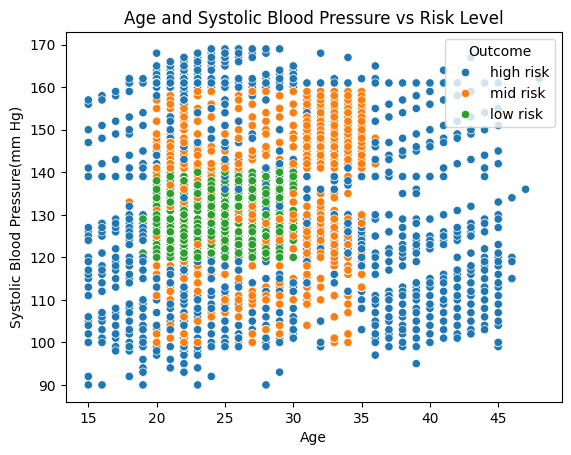

In [445]:
sns.scatterplot(data=data, x='Age', y='Systolic Blood Pressure(mm Hg)', hue='Outcome')
plt.title('Age and Systolic Blood Pressure vs Risk Level')
plt.show()

**Age and Diastolic Blood Pressure vs. Risk Level**

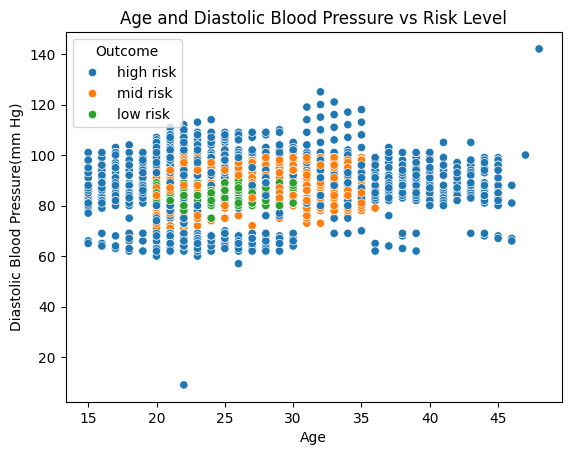

In [446]:
sns.scatterplot(data=data, x='Age', y='Diastolic Blood Pressure(mm Hg)', hue='Outcome')
plt.title('Age and Diastolic Blood Pressure vs Risk Level')
plt.show()

**Age and Blood Glucose (BS) vs. Risk Level**

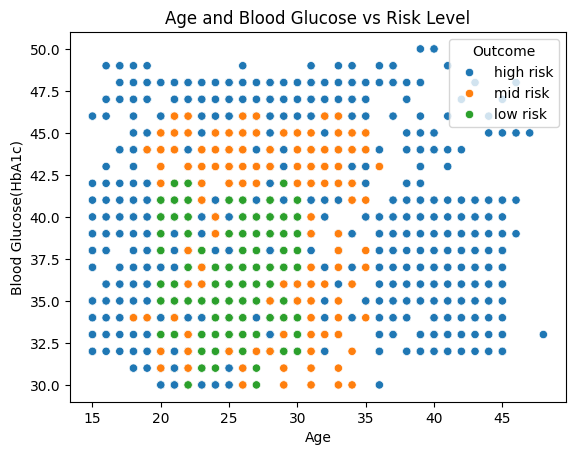

In [447]:
sns.scatterplot(data=data, x='Age', y='Blood Glucose(HbA1c)', hue='Outcome')
plt.title('Age and Blood Glucose vs Risk Level')
plt.show()

**Age and Body Temperature vs. Risk Level**

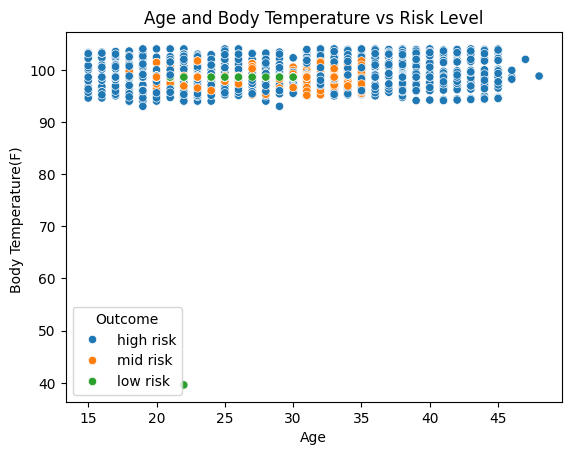

In [448]:
sns.scatterplot(data=data, x='Age', y='Body Temperature(F) ', hue='Outcome') # Added a space after (F)
plt.title('Age and Body Temperature vs Risk Level')
plt.show()

**Age and Heart Rate vs. Risk Level**

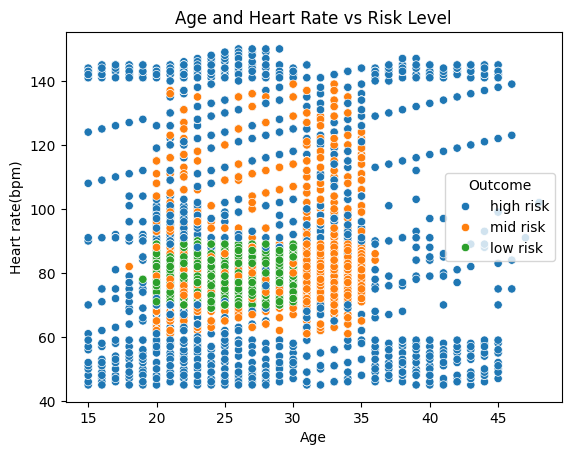

In [449]:
sns.scatterplot(data=data, x='Age', y='Heart rate(bpm)', hue='Outcome')
plt.title('Age and Heart Rate vs Risk Level')
plt.show()


**Systolic and Diastolic Blood Pressure vs. Risk Level**

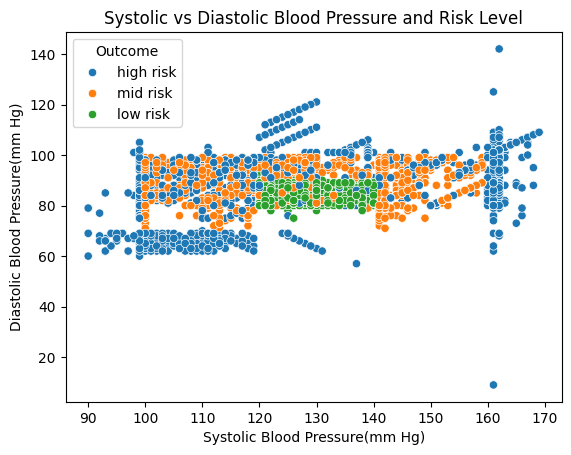

In [450]:
sns.scatterplot(data=data, x='Systolic Blood Pressure(mm Hg)', y='Diastolic Blood Pressure(mm Hg)', hue='Outcome')
plt.title('Systolic vs Diastolic Blood Pressure and Risk Level')
plt.show()

** Systolic Blood Pressure and Blood Glucose (BS) vs. Risk Level**

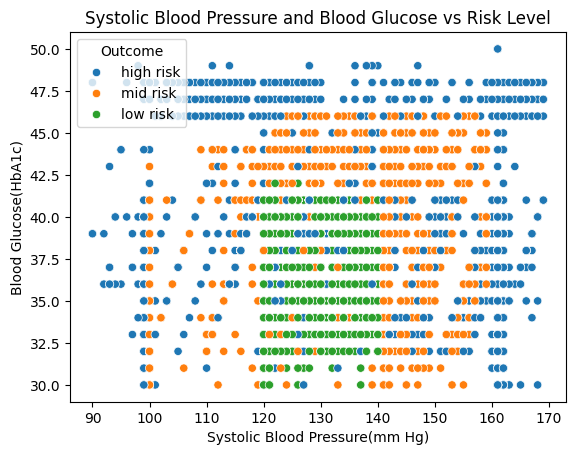

In [451]:
sns.scatterplot(data=data, x='Systolic Blood Pressure(mm Hg)', y='Blood Glucose(HbA1c)', hue='Outcome')
plt.title('Systolic Blood Pressure and Blood Glucose vs Risk Level')
plt.show()

Systolic Blood Pressure and Body Temperature vs. Risk Level

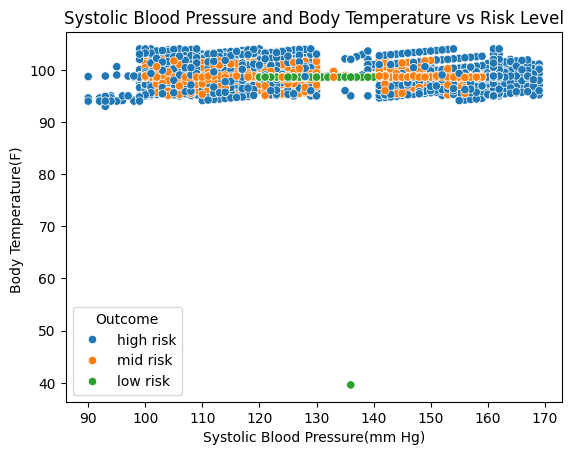

In [452]:
sns.scatterplot(data=data, x='Systolic Blood Pressure(mm Hg)', y='Body Temperature(F) ', hue='Outcome') # Added a space after (F)
plt.title('Systolic Blood Pressure and Body Temperature vs Risk Level')
plt.show()

**Systolic Blood Pressure and Heart Rate vs. Risk Level**

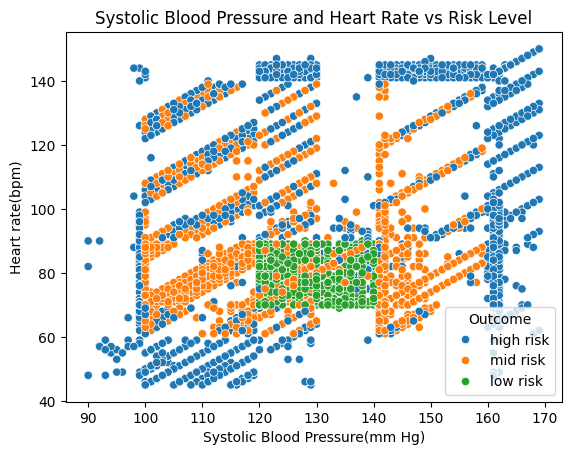

In [453]:
sns.scatterplot(data=data, x='Systolic Blood Pressure(mm Hg)', y='Heart rate(bpm)', hue='Outcome')
plt.title('Systolic Blood Pressure and Heart Rate vs Risk Level')
plt.show()

** Diastolic Blood Pressure and Blood Glucose (BS) vs. Risk Level**

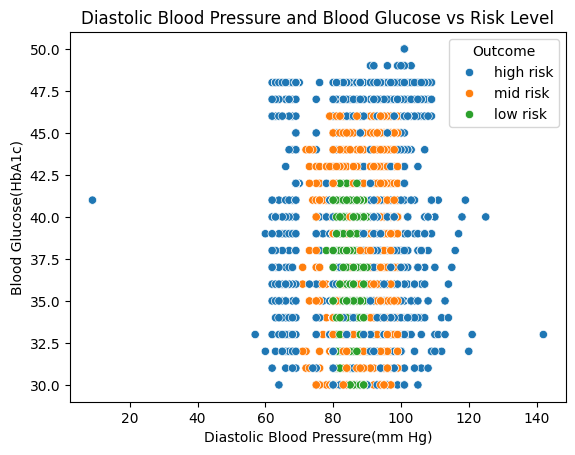

In [454]:
sns.scatterplot(data=data, x='Diastolic Blood Pressure(mm Hg)', y='Blood Glucose(HbA1c)', hue='Outcome')
plt.title('Diastolic Blood Pressure and Blood Glucose vs Risk Level')
plt.show()

**Diastolic Blood Pressure and Body Temperature vs. Risk Level**

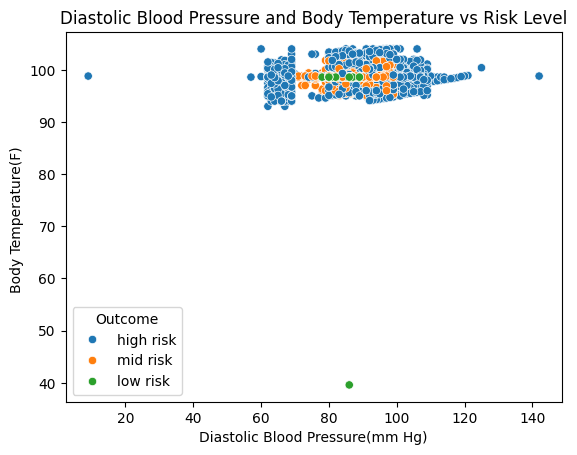

In [455]:
sns.scatterplot(data=data, x='Diastolic Blood Pressure(mm Hg)', y='Body Temperature(F) ', hue='Outcome') # Added a space after (F)
plt.title('Diastolic Blood Pressure and Body Temperature vs Risk Level')
plt.show()

**Diastolic Blood Pressure and Heart Rate vs. Risk Level**

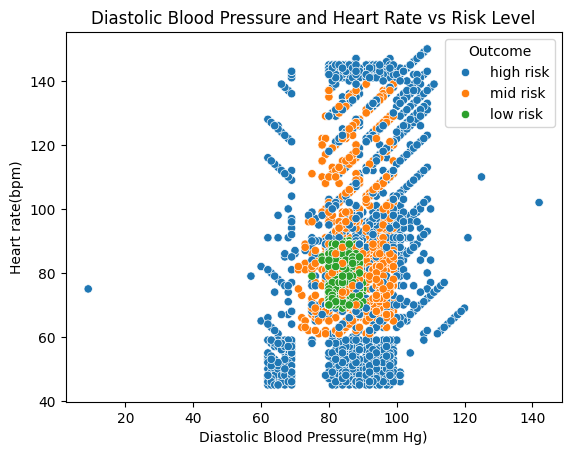

In [456]:
sns.scatterplot(data=data, x='Diastolic Blood Pressure(mm Hg)', y='Heart rate(bpm)', hue='Outcome')
plt.title('Diastolic Blood Pressure and Heart Rate vs Risk Level')
plt.show()

**Blood Glucose (BS) and Body Temperature vs. Risk Level**

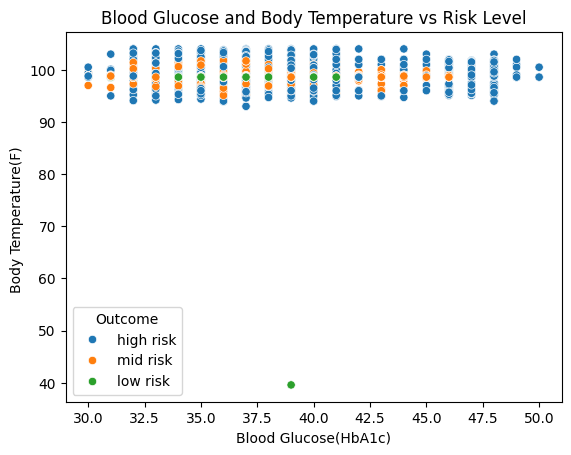

In [457]:
sns.scatterplot(data=data, x='Blood Glucose(HbA1c)', y='Body Temperature(F) ', hue='Outcome') # Added a space after (F) to match the actual column name
plt.title('Blood Glucose and Body Temperature vs Risk Level')
plt.show()

**Blood Glucose (BS) and Heart Rate vs. Risk Level**

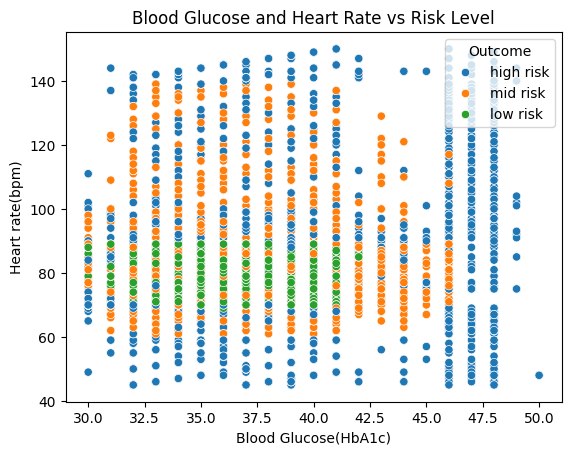

In [458]:
sns.scatterplot(data=data, x='Blood Glucose(HbA1c)', y='Heart rate(bpm)', hue='Outcome')
plt.title('Blood Glucose and Heart Rate vs Risk Level')
plt.show()

**Body Temperature and Heart Rate vs. Risk Level**

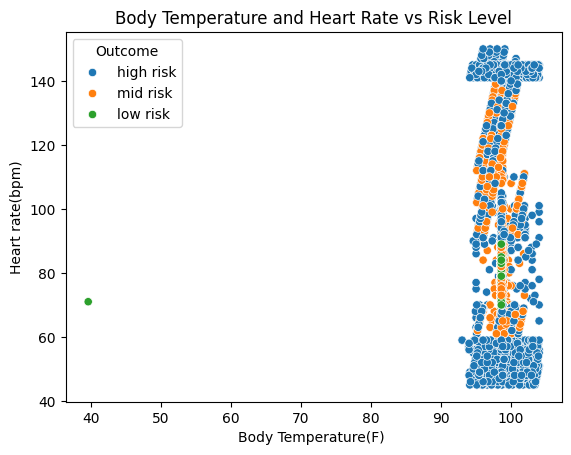

In [459]:
sns.scatterplot(data=data, x='Body Temperature(F) ', y='Heart rate(bpm)', hue='Outcome') # Added a space after (F) to match the actual column name
plt.title('Body Temperature and Heart Rate vs Risk Level')
plt.show()

**Feature Engineering and Data Cleaning**

Based on our previous analysis of the dataset, it was observed that several variables contained outliers. However, it was noted that most of these values still appeared reasonable in real-life contexts. The exception to this was the HeartRate variable, which contained two observations with an unreasonable value of 7 bpm (beats per minute). As a normal resting heart rate for adults ranges from 60 to 100 beats per minute, and the lowest recorded resting heart rate in human history was 25 bpm, it was determined that these two records with the heart rate value of 7 were likely due to input errors. Therefore, we have decided to drop these records to avoid any further inconsistencies.

To maintain a record of the original data, we will store the processed data in a new variable, which can be compared to the original data.

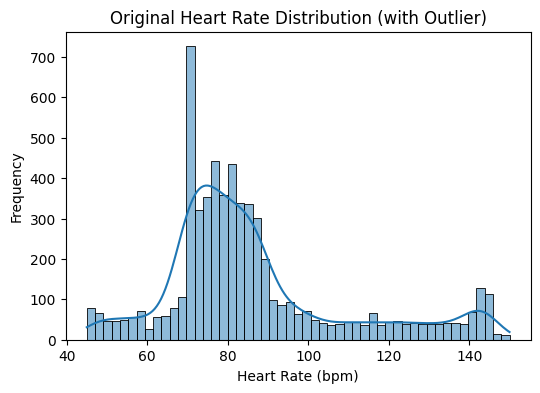

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust figure size as needed

# Plot the original Heart rate distribution
sns.histplot(data=data, x="Heart rate(bpm)", kde=True, ax=ax)
ax.set_title("Original Heart Rate Distribution (with Outlier)")
ax.set_xlabel("Heart Rate (bpm)")
ax.set_ylabel("Frequency")


# Display the plot
plt.show()

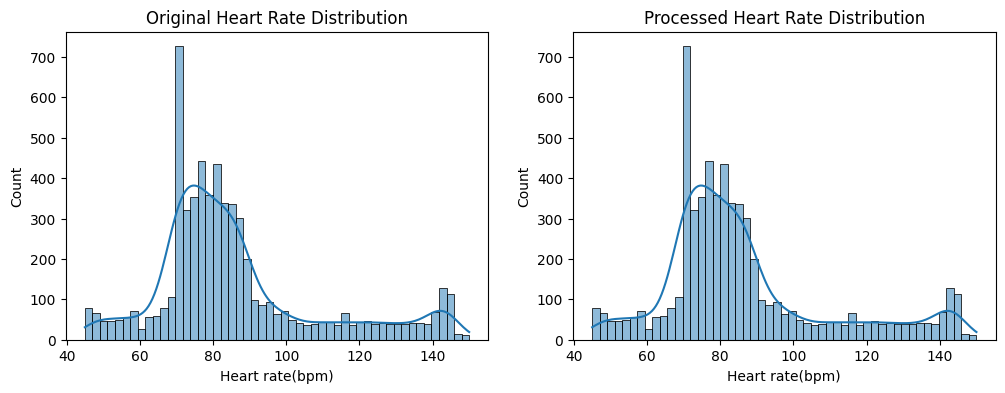

In [461]:
# Remove rows with Heart rate less than a threshold (e.g., 40) or greater than a threshold (e.g., 200)
threshold_low = 40
threshold_high = 200
data_proc = data[(data['Heart rate(bpm)'] > threshold_low) & (data['Heart rate(bpm)'] < threshold_high)]

# Plot the distributions again
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data, x="Heart rate(bpm)", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="Heart rate(bpm)", kde=True, ax=ax[1])
ax[0].set_title("Original Heart Rate Distribution")
ax[1].set_title("Processed Heart Rate Distribution")
plt.show()

In [462]:
# Encode the 'Outcome' column
outcome_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
data['Outcome'] = data['Outcome'].map(outcome_mapping)

In [463]:
# Confirm Encoding
print("\nEncoded 'Outcome' Column (First Few Rows):")
data[['Outcome']].head()


Encoded 'Outcome' Column (First Few Rows):


Outcome
0        2
1        2
2        1
3        2
4        2

**Removing Irrelevant Features**

In [464]:
# Remove rows where Age is 250
data = data[data['Age'] != 250]

# Verify the change
print("Data shape after removing rows with Age 250:", data.shape)
data['Age'].value_counts()  # Check for remaining age values

Data shape after removing rows with Age 250: (6102, 9)


Age
22    737
21    567
20    506
23    505
25    350
26    324
24    308
27    299
28    295
29    294
33    259
31    246
34    235
32    226
30    220
35    209
19     56
18     51
38     41
39     41
36     36
17     35
37     32
40     32
16     30
41     29
15     28
45     27
43     26
44     26
42     26
46      4
47      1
48      1
Name: count, dtype: int64

In [465]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


# Define feature columns (excluding target and non-numeric columns)
# Updated column names to match DataFrame's column names
feature_columns = [
    'Age', 'Body Temperature(F) ',  # Added space after '(F)' to match data
    'Heart rate(bpm)',
    'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
    'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
    'Blood Glucose(Fasting hour-mg/dl)'
]

# 1. Apply Z-Score Method for Outlier Detection and Removal
z_scores = data[feature_columns].apply(zscore)  # Compute Z-scores for all features
outliers_zscore = (z_scores.abs() > 3)  # Identify outliers with Z-score > 3

print("Number of outliers detected (Z-score):")
print(outliers_zscore.sum())

# Remove rows containing outliers based on Z-scores
data_cleaned_zscore = data[~outliers_zscore.any(axis=1)]
print(f"Dataset shape after Z-score outlier removal: {data_cleaned_zscore.shape}")

# 2. Apply Threshold Method for Outlier Detection and Removal
# Adjusted thresholds to match corrected column names
thresholds = {
    'Age': (15, 50),
    'Body Temperature(F) ': (96.0, 103.0),  # Added space after '(F)'
    'Heart rate(bpm)': (60, 140),
    'Systolic Blood Pressure(mm Hg)': (90, 180),
    'Diastolic Blood Pressure(mm Hg)': (80, 120),
    'BMI(kg/m 2)': (18.5, 30.0),
    'Blood Glucose(HbA1c)': (30, 50),
    'Blood Glucose(Fasting hour-mg/dl)': (3.5, 8.9)
}

# Identify outliers based on thresholds
outliers_threshold = pd.DataFrame(False, index=data_cleaned_zscore.index, columns=feature_columns)
for feature, (min_val, max_val) in thresholds.items():
    outliers_threshold[feature] = (
        (data_cleaned_zscore[feature] < min_val) | (data_cleaned_zscore[feature] > max_val)
    )

print("\nNumber of outliers detected (Threshold):")
print(outliers_threshold.sum())

# Remove rows containing outliers based on thresholds
data_cleaned_threshold = data_cleaned_zscore[~outliers_threshold.any(axis=1)]
print(f"Dataset shape after Threshold outlier removal: {data_cleaned_threshold.shape}")

# Save the fully processed dataset
data_cleaned_threshold.to_csv("fully_cleaned_data.csv", index=False)
print("Fully cleaned dataset saved as 'fully_cleaned_data.csv'")

Number of outliers detected (Z-score):
Age                                  59
Body Temperature(F)                  61
Heart rate(bpm)                       0
Systolic Blood Pressure(mm Hg)        0
Diastolic Blood Pressure(mm Hg)      57
BMI(kg/m 2)                           1
Blood Glucose(HbA1c)                  0
Blood Glucose(Fasting hour-mg/dl)     1
dtype: int64
Dataset shape after Z-score outlier removal: (5934, 9)

Number of outliers detected (Threshold):
Age                                    0
Body Temperature(F)                  301
Heart rate(bpm)                      633
Systolic Blood Pressure(mm Hg)         0
Diastolic Blood Pressure(mm Hg)      293
BMI(kg/m 2)                          156
Blood Glucose(HbA1c)                   0
Blood Glucose(Fasting hour-mg/dl)      0
dtype: int64
Dataset shape after Threshold outlier removal: (4856, 9)
Fully cleaned dataset saved as 'fully_cleaned_data.csv'


In [467]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Define features and target variable
X = data.drop('Outcome', axis=1)  # Drop the target variable
y = data['Outcome']

In [468]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Assuming 'X' is your DataFrame
# 3. Feature Engineering
# Example: Create a new feature combining BMI and Systolic Blood Pressure
X['BMI_BP_Ratio'] = X['BMI(kg/m 2)'] / X['Systolic Blood Pressure(mm Hg)']

# Identify columns with non-numeric data
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Drop or encode non-numeric columns
# Option 1: Drop non-numeric columns
X_numeric = X.drop(columns=non_numeric_cols)

# Option 2: Encode non-numeric columns (e.g., one-hot encoding)
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for DataFrame output
# encoded_data = encoder.fit_transform(X[non_numeric_cols])
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_cols))
# X_numeric = pd.concat([X.drop(columns=non_numeric_cols), encoded_df], axis=1)

# Scale the numerical data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

In [469]:
# 2. Feature Selection Using Statistical Method
# Use ANOVA F-statistic to select the top k features (e.g., k=5)
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_scaled, y)

In [470]:
# Get the names of selected features
selected_features = X_scaled.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)', 'BMI_BP_Ratio']


In [471]:
# Convert selected features back to DataFrame
X_final = pd.DataFrame(X_selected, columns=selected_features)

In [472]:
from sklearn.model_selection import train_test_split
X_train, X_part, y_train, y_part = train_test_split(X_scaled,y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_part, y_part, test_size=0.5, random_state=0)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3661, 9)
Validation set shape: (1220, 9)
Test set shape: (1221, 9)


Feature Importances:
                             Feature  Importance
3     Systolic Blood Pressure(mm Hg)    0.222129
1               Body Temperature(F)     0.154453
2                    Heart rate(bpm)    0.145782
6               Blood Glucose(HbA1c)    0.102068
7  Blood Glucose(Fasting hour-mg/dl)    0.097436
4    Diastolic Blood Pressure(mm Hg)    0.093521
0                                Age    0.087535
8                       BMI_BP_Ratio    0.048779
5                        BMI(kg/m 2)    0.048297
Feature importances saved as 'feature_importances.csv'


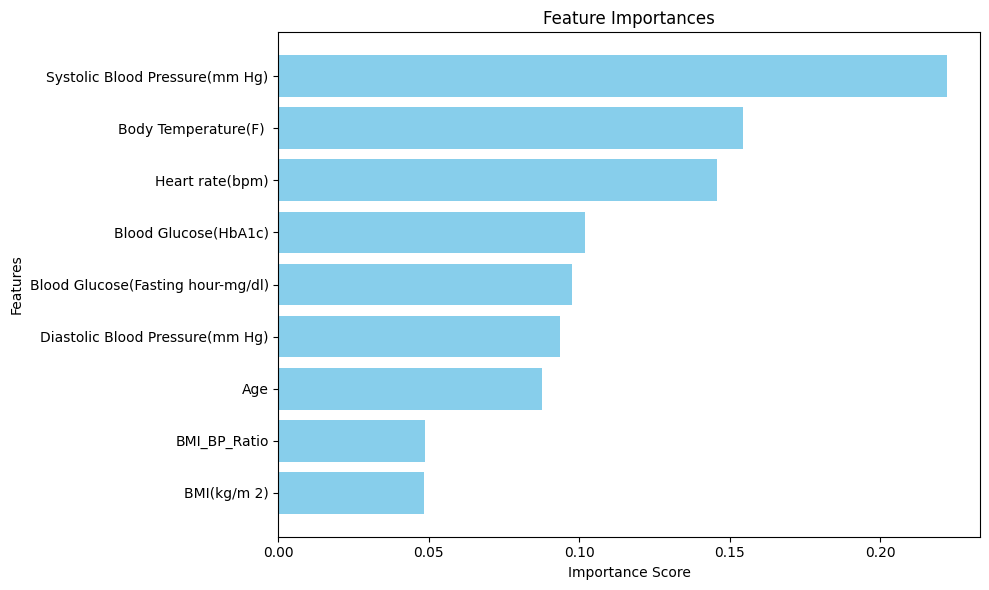

In [473]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the training data
#X_train = pd.read_csv("X_train.csv")
#y_train = pd.read_csv("y_train.csv").values.ravel()  # Ensure y_train is in the correct format

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_model.fit(X_test, y_test)
rf_model.fit(X_val, y_val)

# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_data = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_data)

# Save the feature importance data
feature_importance_data.to_csv("feature_importances.csv", index=False)
print("Feature importances saved as 'feature_importances.csv'")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_data['Feature'], feature_importance_data['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.tight_layout()
plt.show()

**Model Building**

In [474]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Initialize an empty dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)  # Calculate accuracy
    model_accuracies[model_name] = accuracy  # Store accuracy in the dictionary

    print(f"Validation Results for {model_name}:")
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))

# Print model accuracies in the desired format
print("\nModels with Accuracies:")
print("-" * 25)  # Print a separator line
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")


Training Logistic Regression...
Validation Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       396
           1       0.59      0.49      0.54       422
           2       0.62      0.57      0.59       402

    accuracy                           0.65      1220
   macro avg       0.65      0.66      0.65      1220
weighted avg       0.64      0.65      0.64      1220

Confusion Matrix:
[[363  32   1]
 [ 74 208 140]
 [ 60 114 228]]

Training K-Nearest Neighbors...
Validation Results for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.87      0.87      0.87       422
           2       0.95      0.85      0.90       402

    accuracy                           0.90      1220
   macro avg       0.91      0.91      0.90      1220
weighted avg       0.91      0.90      0.90      1220

Confusion Matrix:
[[

In [475]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Initialize an empty dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy
    model_accuracies[model_name] = accuracy  # Store accuracy in the dictionary

    print(f"Validation Results for {model_name}:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

# Print model accuracies in the desired format
print("\nModels with Accuracies:")
print("-" * 25)  # Print a separator line
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")


Training Logistic Regression...
Validation Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.56      0.48      0.52       416
           2       0.62      0.58      0.60       403

    accuracy                           0.64      1221
   macro avg       0.63      0.65      0.64      1221
weighted avg       0.63      0.64      0.63      1221

Confusion Matrix:
[[355  46   1]
 [ 75 199 142]
 [ 62 109 232]]

Training K-Nearest Neighbors...
Validation Results for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       402
           1       0.86      0.91      0.88       416
           2       0.95      0.83      0.89       403

    accuracy                           0.91      1221
   macro avg       0.91      0.91      0.91      1221
weighted avg       0.91      0.91      0.91      1221

Confusion Matrix:
[[

In [476]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd # import pandas

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Initialize an empty dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Evaluate on validation set
    # Ensure X_val has the same columns as X_train
    X_val = pd.DataFrame(X_val, columns=X_scaled.columns)
    # convert X_val to DataFrame with X_train's columns
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)  # Calculate accuracy
    model_accuracies[model_name] = accuracy  # Store accuracy in the dictionary

    print(f"Validation Results for {model_name}:")
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))

# Print model accuracies in the desired format
print("\nModels with Accuracies:")
print("-" * 25)  # Print a separator line
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")


Training Logistic Regression...
Validation Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       396
           1       0.59      0.49      0.54       422
           2       0.62      0.57      0.59       402

    accuracy                           0.65      1220
   macro avg       0.65      0.66      0.65      1220
weighted avg       0.64      0.65      0.64      1220

Confusion Matrix:
[[363  32   1]
 [ 74 208 140]
 [ 60 114 228]]

Training K-Nearest Neighbors...
Validation Results for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.87      0.87      0.87       422
           2       0.95      0.85      0.90       402

    accuracy                           0.90      1220
   macro avg       0.91      0.91      0.90      1220
weighted avg       0.91      0.90      0.90      1220

Confusion Matrix:
[[

In [477]:
# Save the trained models for future use
import joblib

for model_name, model in models.items():
    filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"{model_name} saved as '{filename}'")

Logistic Regression saved as 'logistic_regression_model.pkl'
K-Nearest Neighbors saved as 'k-nearest_neighbors_model.pkl'
Support Vector Machine saved as 'support_vector_machine_model.pkl'
XGBoost saved as 'xgboost_model.pkl'
Random Forest saved as 'random_forest_model.pkl'


In [478]:
2# Function to take user input, scale it, and predict risk level
def predict_risk_with_factors():
    print("\nPlease enter the following details:")
    user_input = {
        "Age": float(input("Age: ")),
        "Body Temperature(F) ": float(input("Body Temperature(F): ")),  # Changed key
        "Heart rate(bpm)": float(input("Heart rate(bpm): ")),  # Changed key
        "Systolic Blood Pressure(mm Hg)": float(input("Systolic Blood Pressure(mm Hg): ")),  # Changed key
        "Diastolic Blood Pressure(mm Hg)": float(input("Diastolic Blood Pressure(mm Hg): ")),  # Changed key
        "BMI(kg/m 2)": float(input("BMI (kg/m^2): ")),  # Changed key
        "Blood Glucose(HbA1c)": float(input("Blood Glucose(HbA1c): ")),  # Changed key
        "Blood Glucose(Fasting hour-mg/dl)": float(input("Blood Glucose(Fasting hour-mg/dl): "))  # Changed key
    }
    # Calculate 'BMI_BP_Ratio' based on user input
    user_input['BMI_BP_Ratio'] = user_input['BMI(kg/m 2)'] / user_input['Systolic Blood Pressure(mm Hg)']

    # Combine inputs into an array for model prediction
    feature_order = [
        "Age",
        "Body Temperature(F) ",  # Changed order
        "Heart rate(bpm)",  # Changed order
        "Systolic Blood Pressure(mm Hg)",  # Changed order
        "Diastolic Blood Pressure(mm Hg)",  # Changed order
        "BMI(kg/m 2)",  # Changed order
        "Blood Glucose(HbA1c)",  # Changed order
        "Blood Glucose(Fasting hour-mg/dl)",  # Changed order
        "BMI_BP_Ratio" # Added the missing feature
    ]
    input_array = [[user_input[feature] for feature in feature_order]]
    input_scaled = scaler.transform(input_array)
    # Convert the scaled array to a DataFrame using the same feature order
    input_df = pd.DataFrame(input_scaled, columns=feature_order)

    # Predict the outcome using the XGBoost model
    predicted_outcome = rf_model.predict(input_df)


    # Get risk level and contributing factors
    risk = risk_level(predicted_outcome)

    # Display results
    if predicted_outcome == 0:  # Low Risk
        print("\nPredicted Risk Level: Low Risk")
        print("Normal, Everything looks fine.")
    else:  # Mid or High Risk
        print(f"\nPredicted Risk Level: {risk}")
        explanations = explain_risk_factors(user_input)
        if explanations:
            print("\nContributing Factors:")
            for explanation in explanations:
                print(f"- {explanation}")
        else:
            print("No specific contributing factors identified.")

# Main loop for user interaction
while True:
    print("\t--- Pregnancy Risk Prediction Menu ---")
    print("1. Enter new data for prediction")
    print("2. Exit")
    choice = input("Choose an option (1 or 2): ")

    if choice == '1':
        predict_risk_with_factors()
        print('-'*200)
    elif choice == '2':
        print("Exiting the program. Thank you!\n")
        print('-'*200)
        break
    else:
        print("Invalid choice. Please select 1 or 2.")

	--- Pregnancy Risk Prediction Menu ---
1. Enter new data for prediction
2. Exit
Choose an option (1 or 2): 1

Please enter the following details:
Age: 20
Body Temperature(F): 98.6
Heart rate(bpm): 76
Systolic Blood Pressure(mm Hg): 126
Diastolic Blood Pressure(mm Hg): 84
BMI (kg/m^2): 21.1
Blood Glucose(HbA1c): 33
Blood Glucose(Fasting hour-mg/dl): 4.7

Predicted Risk Level: Low Risk
Normal, Everything looks fine.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	--- Pregnancy Risk Prediction Menu ---
1. Enter new data for prediction
2. Exit
Choose an option (1 or 2): 1

Please enter the following details:
Age: 25
Body Temperature(F): 98.6
Heart rate(bpm): 76
Systolic Blood Pressure(mm Hg): 136
Diastolic Blood Pressure(mm Hg): 86
BMI (kg/m^2): 22.6
Blood Glucose(HbA1c): 32
Blood Glucose(Fasting hour-mg/dl): 6

Predicted Risk Level: Low

# Step 5: Hyperparameter Tuning and Model Optimization

In [480]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [481]:
# Load preprocessed data
data = np.load("preprocessed_data.npz")
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']

In [482]:
# Define the parameter grids for hyperparameter tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }
}


Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.6609
Validation Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       394
           1       0.56      0.52      0.54       417
           2       0.62      0.57      0.59       409

    accuracy                           0.66      1220
   macro avg       0.65      0.66      0.65      1220
weighted avg       0.65      0.66      0.65      1220

Confusion Matrix:
[[355  38   1]
 [ 58 215 144]
 [ 47 130 232]]


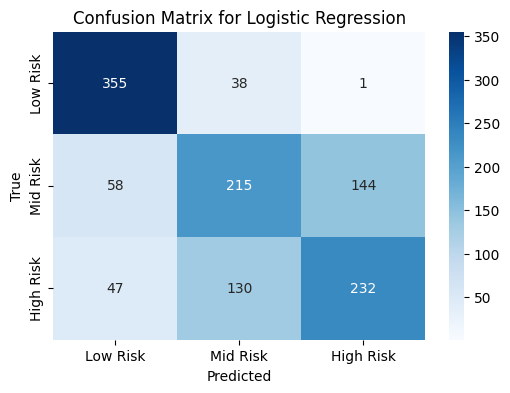


Tuning hyperparameters for K-Nearest Neighbors...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for K-Nearest Neighbors: 0.9158
Validation Results for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       394
           1       0.90      0.89      0.89       417
           2       0.95      0.89      0.92       409

    accuracy                           0.92      1220
   macro avg       0.92      0.93      0.92      1220
weighted avg       0.92      0.92      0.92      1220

Confusion Matrix:
[[392   2   0]
 [ 26 370  21]
 [  3  40 366]]


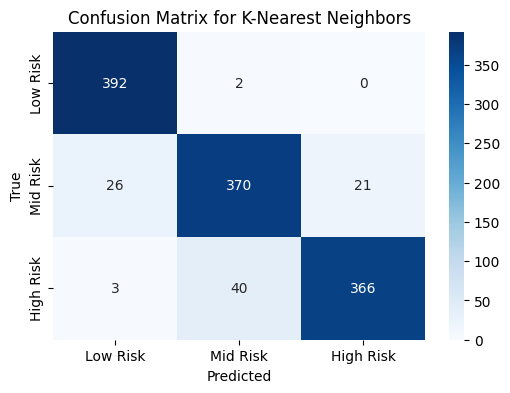


Tuning hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for Support Vector Machine: 0.9473
Validation Results for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       394
           1       0.95      0.93      0.94       417
           2       0.97      0.95      0.96       409

    accuracy                           0.95      1220
   macro avg       0.95      0.95      0.95      1220
weighted avg       0.95      0.95      0.95      1220

Confusion Matrix:
[[390   4   0]
 [ 20 386  11]
 [  4  18 387]]


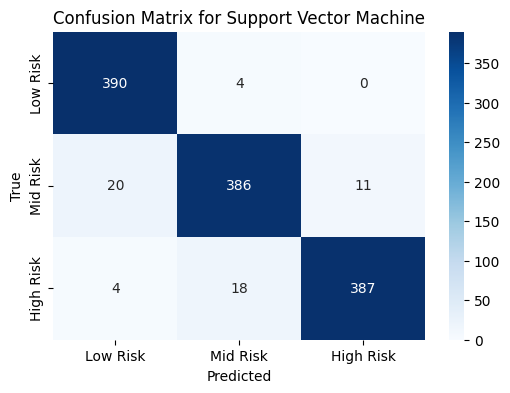


Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score for XGBoost: 0.9902
Validation Results for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       394
           1       0.99      0.99      0.99       417
           2       0.99      0.99      0.99       409

    accuracy                           0.99      1220
   macro avg       0.99      0.99      0.99      1220
weighted avg       0.99      0.99      0.99      1220

Confusion Matrix:
[[394   0   0]
 [  3 411   3]
 [  0   5 404]]


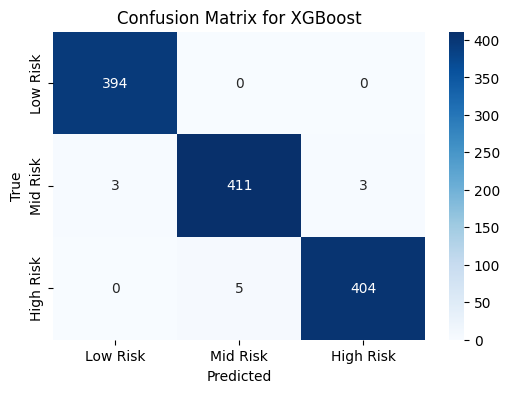


Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score for Random Forest: 0.9893
Validation Results for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       0.98      1.00      0.99       417
           2       1.00      0.98      0.99       409

    accuracy                           0.99      1220
   macro avg       0.99      0.99      0.99      1220
weighted avg       0.99      0.99      0.99      1220

Confusion Matrix:
[[394   0   0]
 [  1 415   1]
 [  0   9 400]]


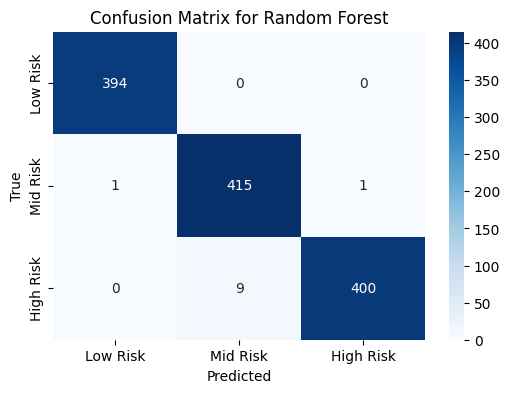

In [483]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Function to perform Grid Search or Randomized Search for each model
def hyperparameter_tuning(model, param_grid, search_type='grid'):
    if search_type == 'grid':
        search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    elif search_type == 'random':
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2)

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_params = search.best_params_
    return best_model, best_params, search.best_score_

    # Train and optimize each model
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    best_model, best_params, best_score = hyperparameter_tuning(model, param_grids[model_name], search_type='grid')

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")

    # Evaluate on validation set
    y_val_pred = best_model.predict(X_val)
    print(f"Validation Results for {model_name}:")
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix:")
    # Assign the confusion matrix to the variable 'cm'
    cm = confusion_matrix(y_val, y_val_pred)
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'Mid Risk', 'High Risk'],
                yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [484]:
print("\nModel Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")


Model Accuracies:
Logistic Regression: 0.65
K-Nearest Neighbors: 0.90
Support Vector Machine: 0.93
XGBoost: 0.99
Random Forest: 0.99


In [485]:
# Save the optimized model
import joblib
filename = f"{model_name.replace(' ', '_').lower()}_optimized_model.pkl"
joblib.dump(best_model, filename)
print(f"{model_name} optimized and saved as '{filename}'")

Random Forest optimized and saved as 'random_forest_optimized_model.pkl'


# Step 6: Model Evaluation and Refinement

In [486]:
# Check which keys are available
data = np.load("preprocessed_data.npz")
print(data.files)

# Assuming the test data is stored under 'X_val' and 'y_val'
X_test, y_test = data['X_val'], data['y_val']  # Adjust according to the actual keys

['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']


In [487]:
np.savez("preprocessed_data.npz", X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)

In [488]:
# After optimizing the model, save it
import joblib
filename = f"k_nearest_neighbors_model.pkl"
joblib.dump(best_model, filename)
print(f"K-Nearest Neighbors and saved as '{filename}'")

K-Nearest Neighbors and saved as 'k_nearest_neighbors_model.pkl'



Evaluating Logistic Regression on the test set...
Accuracy: 0.6508
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       394
           1       0.58      0.48      0.53       417
           2       0.62      0.58      0.60       409

    accuracy                           0.65      1220
   macro avg       0.64      0.66      0.64      1220
weighted avg       0.64      0.65      0.64      1220

Confusion Matrix:
[[357  36   1]
 [ 74 201 142]
 [ 63 110 236]]


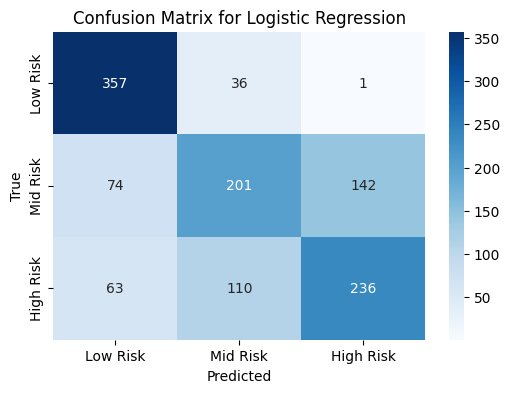


Evaluating K-Nearest Neighbors on the test set...
Accuracy: 0.9910
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       0.98      1.00      0.99       417
           2       1.00      0.98      0.99       409

    accuracy                           0.99      1220
   macro avg       0.99      0.99      0.99      1220
weighted avg       0.99      0.99      0.99      1220

Confusion Matrix:
[[394   0   0]
 [  1 415   1]
 [  0   9 400]]


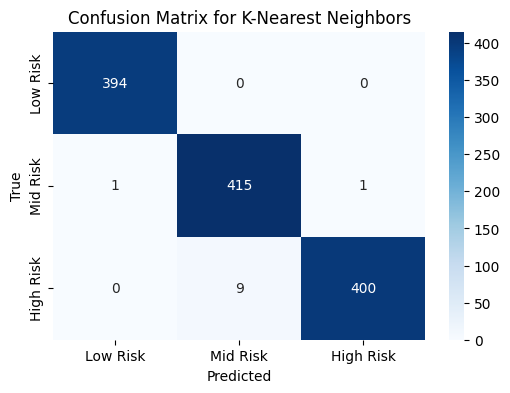


Evaluating Support Vector Machine on the test set...
Accuracy: 0.9336
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       394
           1       0.91      0.91      0.91       417
           2       0.97      0.90      0.93       409

    accuracy                           0.93      1220
   macro avg       0.93      0.93      0.93      1220
weighted avg       0.93      0.93      0.93      1220

Confusion Matrix:
[[388   6   0]
 [ 23 381  13]
 [  6  33 370]]


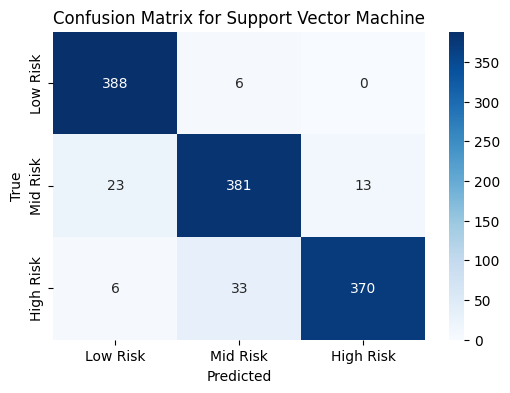


Evaluating Random Forest on the test set...
Accuracy: 0.9926
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       0.98      1.00      0.99       417
           2       1.00      0.98      0.99       409

    accuracy                           0.99      1220
   macro avg       0.99      0.99      0.99      1220
weighted avg       0.99      0.99      0.99      1220

Confusion Matrix:
[[394   0   0]
 [  1 416   0]
 [  0   8 401]]


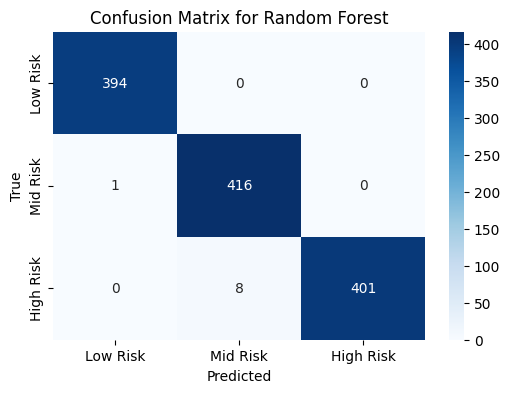


Evaluating XGBoost on the test set...
Accuracy: 0.9369
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       394
           1       0.99      0.88      0.93       417
           2       0.85      0.99      0.92       409

    accuracy                           0.94      1220
   macro avg       0.94      0.94      0.94      1220
weighted avg       0.94      0.94      0.94      1220

Confusion Matrix:
[[370   0  24]
 [  3 368  46]
 [  0   4 405]]


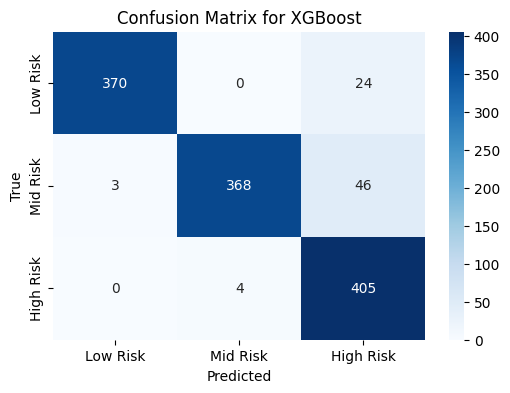

In [489]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the preprocessed test data
data = np.load("preprocessed_data.npz")
X_test, y_test = data['X_test'], data['y_test']

# Define the models and hyperparameters
models = {
    "Logistic Regression": joblib.load('logistic_regression_model.pkl'),
    "K-Nearest Neighbors": joblib.load('k_nearest_neighbors_model.pkl'),
    "Support Vector Machine": joblib.load('support_vector_machine_model.pkl'),
    "Random Forest": joblib.load('random_forest_model.pkl'),
    "XGBoost": joblib.load('xgboost_model.pkl')
}

# Evaluate models on test set
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} on the test set...")

    # Make predictions
    y_test_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'Mid Risk', 'High Risk'],
                yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Refining the Model

After evaluating the model’s performance, you might need to refine it to improve accuracy or handle any issues (e.g., overfitting or underfitting). Refining may involve:

Hyperparameter tuning: Adjusting model parameters to get the best performance. Feature engineering: Improving the features used for training. Cross-validation: To check the robustness of the model.

In [490]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

# Define the parameter grid for each model
param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    "Support Vector Machine": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    "XGBoost": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

# Hyperparameter tuning function
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    return best_model, best_params, best_score

# Load the preprocessed data (X_train, y_train, X_test, y_test)
data = np.load("preprocessed_data.npz")
X_train, y_train = data['X_train'], data['y_train']
X_test, y_test = data['X_test'], data['y_test']

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

# Store the best models, parameters, and their scores
best_models = {}
best_params = {}
best_scores = {}

# Perform hyperparameter tuning for each model
for model_name, model in models.items():
    print(f"\nTuning {model_name}...")
    best_model, best_param, best_score = tune_model(model, param_grids[model_name], X_train, y_train)

    # Store the best model, parameters, and score
    best_models[model_name] = best_model
    best_params[model_name] = best_param
    best_scores[model_name] = best_score

    print(f"Best Parameters for {model_name}: {best_param}")
    print(f"Best Cross-validation Score for {model_name}: {best_score:.4f}")

# Evaluate all models on the test set and select the best one based on accuracy
best_model_name = None
best_accuracy = 0
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} on the test set...")
    y_test_pred = model.predict(X_test)

    # Calculate accuracy and other evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_test_pred))

    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_test_pred))

    # Track the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

print(f"\nBest Model: {best_model_name} with accuracy {best_accuracy:.4f}")


Tuning Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Cross-validation Score for Logistic Regression: 0.6582

Tuning K-Nearest Neighbors...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Best Cross-validation Score for K-Nearest Neighbors: 0.9077

Tuning Support Vector Machine...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Support Vector Machine: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-validation Score for Support Vector Machine: 0.9426

Tuning Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score for Random Forest: 0.9872

Tuning XGBoost...
Fitting 3 folds for each of 8 candidates, t

Saving the Optimized Model

Once you have optimized your model, save it to a file for later use.

In [491]:
import joblib

# Assuming 'best_model' is the model selected based on evaluation (after hyperparameter tuning)
best_model_filename = f"{best_model_name.replace(' ', '_').lower()}_optimized_model.pkl"
joblib.dump(best_model, best_model_filename)
print(f"Optimized {best_model_name} model saved as '{best_model_filename}'")

Optimized XGBoost model saved as 'xgboost_optimized_model.pkl'


Refinement Based on Performance

If you notice that the model is underperforming (e.g., low accuracy, high variance), consider refining the model by:

Feature Engineering: Add, remove, or modify features to improve performance.

Ensemble Methods: Combine predictions from multiple models to boost accuracy.

Data Augmentation: If you have limited data, consider using techniques like oversampling or generating synthetic data.

Feature Engineering

If you believe that your features could be improved, consider adding or modifying features. This might include adding interaction terms, polynomial features, or applying scaling.

In [492]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features for the training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Retrain the best model using the new features
best_model.fit(X_train_poly, y_train)

# Save the newly trained model
best_model_filename_refined = f"{best_model_name.replace(' ', '_').lower()}_refined_optimized_model.pkl"
joblib.dump(best_model, best_model_filename_refined)
print(f"Refined Optimized {best_model_name} model saved as '{best_model_filename_refined}'")

Refined Optimized XGBoost model saved as 'xgboost_refined_optimized_model.pkl'


Ensemble Methods

You can combine multiple models to improve performance using ensemble methods such as Voting Classifier, Bagging, or Boosting.

In [493]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base models for the ensemble
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Create an ensemble model using a soft voting classifier
ensemble_model = VotingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Save the ensemble model
ensemble_model_filename = 'ensemble_optimized_model.pkl'
joblib.dump(ensemble_model, ensemble_model_filename)
print(f"Ensemble model saved as '{ensemble_model_filename}'")

Ensemble model saved as 'ensemble_optimized_model.pkl'


Data Augmentation

If you have limited data, you might want to try techniques such as oversampling, SMOTE (Synthetic Minority Over-sampling Technique), or generating synthetic data.

In [494]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic data and balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Retrain the best model using the synthetic data
best_model.fit(X_train_smote, y_train_smote)

# Save the retrained model
best_model_filename_augmented = f"{best_model_name.replace(' ', '_').lower()}_augmented_optimized_model.pkl"
joblib.dump(best_model, best_model_filename_augmented)
print(f"Augmented Optimized {best_model_name} model saved as '{best_model_filename_augmented}'")

Augmented Optimized XGBoost model saved as 'xgboost_augmented_optimized_model.pkl'


**Address Overfitting Using Regularization **

Before jumping into data augmentation, the first step is to apply regularization to the model, which can reduce overfitting by penalizing large weights in the model. For instance, in logistic regression, SVMs, or XGBoost, regularization is often applied by setting parameters like C, alpha, or lambda.

In XGBoost, we can use lambda and alpha parameters for L2 and L1 regularization, respectively.

In [495]:
from xgboost import XGBClassifier

# Use regularization parameters in XGBoost
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                      alpha=0.5, reg_lambda=0.5)  # L1 and L2 regularization
model.fit(X_train, y_train)

XGBClassifier(alpha=0.5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

**Data Augmentation and Synthetic Data Creation**

For tabular data, one common approach for data augmentation is SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples by interpolating between existing samples. This technique is useful when the data is imbalanced but can also serve to augment the data for generalization.

You can use imblearn's SMOTE implementation to augment the data.

In [496]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Perform SMOTE to create synthetic data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split the augmented data into training and validation sets
X_train_augmented, X_val, y_train_augmented, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Cross-Validation for Model Validation**

K-fold cross-validation helps ensure that the model's performance is robust and not dependent on a single train-test split. By splitting the data into k subsets and iterating through different folds, you ensure that the model generalizes well across the entire dataset.

In [497]:
from sklearn.model_selection import cross_val_score

# Apply cross-validation
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.98497268 0.9931694  0.98087432 0.99043716 0.99043716]
Average cross-validation score: 0.9880


**Early Stopping (for XGBoost)**

If you're using XGBoost, you can also employ early stopping to prevent overfitting by halting training when the validation score stops improving.

**Final Model Validation**

Once you've done data augmentation and hyperparameter tuning, you should validate your model on new, unseen data to assess its real-world performance.

In [ ]:
2# Function to take user input, scale it, and predict risk level
def predict_risk_with_factors():
    print("\nPlease enter the following details:")
    user_input = {
        "Age": float(input("Age: ")),
        "Body Temperature(F) ": float(input("Body Temperature(F): ")),  # Changed key
        "Heart rate(bpm)": float(input("Heart rate(bpm): ")),  # Changed key
        "Systolic Blood Pressure(mm Hg)": float(input("Systolic Blood Pressure(mm Hg): ")),  # Changed key
        "Diastolic Blood Pressure(mm Hg)": float(input("Diastolic Blood Pressure(mm Hg): ")),  # Changed key
        "BMI(kg/m 2)": float(input("BMI (kg/m^2): ")),  # Changed key
        "Blood Glucose(HbA1c)": float(input("Blood Glucose(HbA1c): ")),  # Changed key
        "Blood Glucose(Fasting hour-mg/dl)": float(input("Blood Glucose(Fasting hour-mg/dl): "))  # Changed key
    }
    # Calculate 'BMI_BP_Ratio' based on user input
    user_input['BMI_BP_Ratio'] = user_input['BMI(kg/m 2)'] / user_input['Systolic Blood Pressure(mm Hg)']

    # Combine inputs into an array for model prediction
    feature_order = [
        "Age",
        "Body Temperature(F) ",  # Changed order
        "Heart rate(bpm)",  # Changed order
        "Systolic Blood Pressure(mm Hg)",  # Changed order
        "Diastolic Blood Pressure(mm Hg)",  # Changed order
        "BMI(kg/m 2)",  # Changed order
        "Blood Glucose(HbA1c)",  # Changed order
        "Blood Glucose(Fasting hour-mg/dl)",  # Changed order
        "BMI_BP_Ratio" # Added the missing feature
    ]
    input_array = [[user_input[feature] for feature in feature_order]]
    input_scaled = scaler.transform(input_array)
    # Convert the scaled array to a DataFrame using the same feature order
    input_df = pd.DataFrame(input_scaled, columns=feature_order)

    # Predict the outcome using the XGBoost model
    predicted_outcome = rf_model.predict(input_df)


    # Get risk level and contributing factors
    risk = risk_level(predicted_outcome)

    # Display results
    if predicted_outcome == 0:  # Low Risk
        print("\nPredicted Risk Level: Low Risk")
        print("Normal, Everything looks fine.")
    else:  # Mid or High Risk
        print(f"\nPredicted Risk Level: {risk}")
        explanations = explain_risk_factors(user_input)
        if explanations:
            print("\nContributing Factors:")
            for explanation in explanations:
                print(f"- {explanation}")
        else:
            print("No specific contributing factors identified.")

# Main loop for user interaction
while True:
    print("\t--- Pregnancy Risk Prediction Menu ---")
    print("1. Enter new data for prediction")
    print("2. Exit")
    choice = input("Choose an option (1 or 2): ")

    if choice == '1':
        predict_risk_with_factors()
        print('-'*200)
    elif choice == '2':
        print("Exiting the program. Thank you!\n")
        print('-'*200)
        break
    else:
        print("Invalid choice. Please select 1 or 2.")

	--- Pregnancy Risk Prediction Menu ---
1. Enter new data for prediction
2. Exit

Please enter the following details:

Predicted Risk Level: High Risk

Contributing Factors:
- High Systolic Blood Pressure(mm Hg) (161.0) raises the risk during pregnancy.
- High Diastolic Blood Pressure(mm Hg) (100.0) raises the risk during pregnancy.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	--- Pregnancy Risk Prediction Menu ---
1. Enter new data for prediction
2. Exit

Please enter the following details:

Predicted Risk Level: Mid Risk

Contributing Factors:
- High Systolic Blood Pressure(mm Hg) (129.0) raises the risk during pregnancy.
- High Diastolic Blood Pressure(mm Hg) (87.0) raises the risk during pregnancy.
-----------------------------------------------------------------------------------------------------------------------------------